# Nissan data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data import

In [9]:
import os
import sys
os.listdir()
cwd = os.getcwd()
ind = cwd.rfind('/')
addpath = cwd[:ind] + '/Data'
sys.path.append(addpath)

In [10]:
addpath

'/Users/edz/PycharmProjects/NissanBD/Data'

In [13]:
tgt_fil = os.listdir(addpath)[0]
print(tgt_fil)
print (addpath + tgt_fil)

MPCR VI VA TPVA data 2019.xlsx
/Users/edz/PycharmProjects/NissanBD/DataMPCR VI VA TPVA data 2019.xlsx


In [16]:
os.listdir(addpath)

['MPCR VI VA TPVA data 2019.xlsx',
 '__init__.py',
 'Jato Extract EGB 20221130.xlsx',
 'Sales Volume FRA & EGB 2019-2022 Brand+Model+version+Unique ID.xlsx']

In [18]:
viva = os.listdir(addpath)[0]
viva = addpath + '/' + viva
print(viva)

/Users/edz/PycharmProjects/NissanBD/Data/MPCR VI VA TPVA data 2019.xlsx


In [21]:
sales = os.listdir(addpath)[3]
sales = addpath + '/' + sales
print(sales)

/Users/edz/PycharmProjects/NissanBD/Data/Sales Volume FRA & EGB 2019-2022 Brand+Model+version+Unique ID.xlsx


In [22]:
tgt_fil = os.listdir(addpath)[2]
df=pd.read_excel(addpath+'/'+tgt_fil)
vdf = pd.read_excel(viva)
sdf = pd.read_excel(sales)

In [23]:
df.head(3)

,UID,Country,Make,Model,Version,Model gener,Data status,Data date,Body type,Doors,Liters,kW,hp/PS,Fuel,Powertrain type,type,Price curr,Price,Price + del,Cty price,Charges,nat tax 2 name,nat tax 2 amnt,nat tax 3 name,nat tax 3 amnt,Version state,Seating cap,Emis ctrl level,std met,CO2 g/km cm,WLTP emissions,testing type,comb,comb LV,comb HV,Power,max torq Nm,Secondary power,hp/PS.1,max torque nm,Start/Stop,Engine,# of cyls,Electric motor,motor number,pwr motor kW,max torqe Nm,Hybrid type,hybrid type,Plug-in,Elec drvn whls,elec drvn whls,Performance,max speed(km/h),acc 0-100 km/h,max elec (km/h),Elec pwr srce,range (km),WLTP elec range,test type,comb km,comb km LV,comb km HV,WLTP EEC,comb.1,comb LV.1,comb HV.1,test type.1,Charging cnnctr,type.1,Charging info,scenario,max kW sup,Battery subscrp,batt subs price,Energy recup,Solar power,Pow consumption,cmb (kWh/100km),Rem batt mgmt,batt stat check,rem chrge act,rem chrg tim,rem bt preheat,chrg cptn alrt,Remot eng start,Block htr,Fuel use (new),standard,combinedl/100km,Comb l/100km LV,Comb l/100km HV,gas combined kg,gas ctry/hwy kg,Particle filter,Trans,# of speeds,mode sel (AT),trans dsc,g/change pad,Trans.,Wheels,Drive,4wd type,Wheels.1,desc ctrl sys,Wrnty wl vh Tot,months,Warr battery,duration (mth),Hill holder,Diff lock,locn,L.S.D.,locn.1,type.2,Ter type sel,Underbdy protn,locn.2,4-wheel steer,Resp susp,driver select,type.3,Driver modes,inc eng map,inc steering,inc susp,Susp level,operation,Power steer,Ceramic brakes,Cruise ctrl,adap cruise con,stop/go fnctn,Speed limiter,Lane dep wrn,act brakes,act steering,Overtake sensor,Anti Collision,dr monitor,auto emerg brk,brks at low spd,min act spd kph,ped & cycle av,Trf sgn rcgntn,Computer,Instrument pnl,type.4,HUD,360 view cam,Park dist sys,location,type.5,Pkng spc info,Parking assist,location.1,type.6,Elec hand brake,Fr fog lts,Headlts,lens type,bulb type (low),LED lights,location.2,Headlt ctrl,dusk sensor,auto hibeam,dir headlights,Crng lts/crb il,Wipers,rain sensor,Rr view mirr,auto-dimming,inc r view cam,digital,Front airbag,locn.3,Side airbag,locn.4,Sd crtn airbag,location.3,Knee airbags,location.4,Anti sub airbag,location.5,Isofix preparat,ABS,Disc brakes,# of,# of vent discs,Stab. ctrl.,Low tire indic,disp press,Anti-theft,peripheral,anti-lift,Steering wheel,type.7,height adj,tele adjust,elec adjust,heated,Elcly fldble ms,operation.1,Frt seat,locn.5,type.8,reclining type,reach type,height type,lumbar type,seat fold table,heated.1,active/massage,ventilated,climate cntrd,folding,R seats,reclining type.1,reach type.1,heated.2,folding.1,fold to floor,electric fold,3rd row seats,fold to floor.1,electric fold.1,Seat upholst,main seat mat,add seat mat,Frt ctr armrest,Rr ctr armrest,Blind,location.6,Luxury trim,on shift knob,on ctr flr cnsl,on doors,on I/P,Floor mats,Vent system,auto recirc,heater type,A/C,air cond type,rear ctrl c/c,climate zones,Rem HVAC ctrl,inc key,inc inet,inc phone,Power locks,operation.2,inc pwr wndos,auto locking,Smart card/key,type.9,inc keyl entry,inc keyl start,Rem trk/hat rel,operation.3,Elec trunk shut,Sunroof,locn.6,type.10,operation.4,Glass roof,Panoram w/scrn,Doors.1,location.7,type.11,electric,Door mirrs/cam,locn.7,type.12,heated.3,col,auto-dimming.1,tilt for rev,Power wndos,locn.8,# of express,R window,type.13,R side windows,type.14,Wdsr wpr deicer,Heated washer,Ele heat wdshld,Night vision,Rem aud ctrl,type.15,Aud system,brand name,radio,in-dash CD,dgtl media card,digital radio,inet radio,Speakers,# of.1,brand name.1,cn 2 ext ent dv,ipod fr,USB fr,USB cnnctn rear,DVD/VCD,Int Mem/HD,stor cap (GB),Bluetooth,inc phone cx,inc music str,Nav systems,info. type,controls,display type,rem/por,scrn size (in),traffic info,Mlt fnc dsp scr,scrn size (in).1,location.8,Ent disp scrn,location.9,digital tv,Internet,Voice system,inc aud player,inc phone.1,inc navigation,Traffic Info.,12v power,outlets,Mem adjust,Telematics,inc eng sht dwn,Adv At Clsn Nt,tracker syst,Veh start bttn,R crs-trfc alrt,Wifi network,Wrlss c

In [25]:
df.shape

(3471, 410)

## Data cleaning and understanding

### remove overly null values

In [26]:
df = df.loc[:, df.isnull().mean() < 0.2] #keep cols with less than 20% null

In [27]:
df.shape #298 0.2

(3471, 298)

### field analysis

In [12]:
df.nunique()

UID                 3471
Country                1
Make                  44
Model                290
Version             2879
Model gener           10
Data status            3
Data date             91
Body type             10
Doors                  4
Liters                27
kW                   197
hp/PS                207
Fuel                   6
Powertrain type        1
type                   7
Price curr             2
Price               2964
Price + del         2843
Cty price           2805
Charges                1
nat tax 2 name         2
nat tax 2 amnt        11
nat tax 3 name         3
nat tax 3 amnt         2
Version state         38
Seating cap            7
Emis ctrl level        2
std met                4
WLTP emissions         2
testing type           7
comb                 362
Power                  1
max torq Nm          133
Secondary power        2
Start/Stop             2
Engine                 2
# of cyls              8
Electric motor         2
Hybrid type            3


In [13]:
df.describe()

,UID,Model gener,Doors,Liters,kW,hp/PS,Price,Price + del,Cty price,nat tax 2 amnt,nat tax 3 amnt,Seating cap,max torq Nm,# of cyls,max speed(km/h),acc 0-100 km/h,months,# of,# of.1,scrn size (in),kerb wt (kg),facelift gen,O.A. length,msrp
count,3.471000e+03,3471.000000,3471.000000,3188.000000,3471.000000,3471.000000,3471.000000,3371.000000,3370.000000,3470.00000,3470.000000,3471.000000,3381.000000,3188.000000,3451.000000,3438.000000,3471.000000,3471.000000,3459.000000,2988.000000,3419.000000,3471.000000,3470.000000,3471.000000
mean,8.072120e+06,2.893402,4.643907,1.938049,163.469317,222.252665,46446.938614,45232.781996,45750.526113,277.93804,54.936599,5.007779,364.476782,4.220201,212.842944,8.168935,42.216076,3.834630,8.531078,10.543993,1657.226382,0.409104,4554.720461,46446.938614
std,6.049829e+05,2.029648,0.841960,0.814655,89.923657,122.279358,27434.949520,25093.101237,25283.164913,182.71078,1.866552,0.820274,169.288595,1.209135,32.655829,2.432078,19.182079,0.550891,4.012539,1.815315,372.645126,0.526276,333.647989,27434.949520
min,3.321000e+04,1.000000,2.000000,0.900000,48.000000,65.000000,11755.000000,12350.000000,12595.000000,0.00000,0.000000,2.000000,91.000000,2.000000,130.000000,2.700000,24.000000,2.000000,2.000000,7.000000,895.000000,0.000000,2695.000000,11755.000000
25%,8.071820e+06,1.000000,5.000000,1.500000,100.000000,136.000000,29727.500000,29860.000000,30111.250000,155.00000,55.000000,5.000000,240.000000,4.000000,190.000000,6.300000,36.000000,4.000000,6.000000,9.200000,1384.000000,0.000000,4368.000000,29727.500000
50%,8.199727e+06,2.000000,5.000000,2.000000,135.000000,184.000000,37860.000000,37850.000000,38215.000000,165.00000,55.000000,5.000000,320.000000,4.000000,209.000000,8.300000,36.000000,4.000000,8.000000,10.250000,1600.000000,0.000000,4580.000000,37860.000000
75%,8.285210e+06,4.000000,5.000000,2.000000,210.000000,286.000000,54037.500000,52872.500000,53383.750000,510.00000,55.000000,5.000000,450.000000,4.000000,235.000000,9.900000,36.000000,4.000000,10.000000,12.300000,1893.000000,1.000000,4762.000000,54037.500000
max,8.351369e+06,12.000000,5.000000,6.000000,620.000000,843.000000,239230.000000,222990.000000,216960.000000,540.00000,55.000000,9.000000,1470.000000,12.000000,341.000000,17.300000,120.000000,4.000000,35.000000,17.700000,2921.000000,2.000000,5469.000000,239230.000000


### recast msrp as numerical

In [28]:
df['msrp'].dtype

dtype('float64')

In [29]:
df["msrp"] = [float(str(i).replace(",", "")) for i in df["msrp"]]

In [30]:
df["msrp"].dtype

dtype('float64')

### data types

In [17]:
df.dtypes

UID                          int64
Country                     object
Make                        object
Model                       object
Version                     object
Model gener                  int64
Data status                 object
Data date           datetime64[ns]
Body type                   object
Doors                        int64
Liters                     float64
kW                           int64
hp/PS                        int64
Fuel                        object
Powertrain type             object
type                        object
Price curr                  object
Price                      float64
Price + del                float64
Cty price                  float64
Charges                     object
nat tax 2 name              object
nat tax 2 amnt             float64
nat tax 3 name              object
nat tax 3 amnt             float64
Version state               object
Seating cap                  int64
Emis ctrl level             object
std met             

In [18]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

numeric_data.shape[1], categorical_data.shape[1]

(24, 274)

In [19]:
numeric_data.corr()

,UID,Model gener,Doors,Liters,kW,hp/PS,Price,Price + del,Cty price,nat tax 2 amnt,nat tax 3 amnt,Seating cap,max torq Nm,# of cyls,max speed(km/h),acc 0-100 km/h,months,# of,# of.1,scrn size (in),kerb wt (kg),facelift gen,O.A. length,msrp
UID,1.000000,-0.067529,0.036268,-0.034573,0.015915,0.015946,0.027712,0.064197,0.062746,-0.009704,0.460318,0.044908,0.006590,-0.019577,-0.052771,-0.013852,0.039876,0.005608,0.038865,0.075369,0.072813,-0.078693,0.044078,0.027712
Model gener,-0.067529,1.000000,-0.130991,0.051554,0.011581,0.011658,0.059398,0.031065,0.032961,0.114095,-0.001785,-0.059567,-0.009534,0.045643,0.157063,-0.026138,0.034434,0.042479,0.027021,0.175872,-0.060726,0.009812,0.104214,0.059398
Doors,0.036268,-0.130991,1.000000,-0.398199,-0.321893,-0.322139,-0.313447,-0.269684,-0.268178,-0.297618,-0.014372,0.570668,-0.211237,-0.347600,-0.438746,0.371520,-0.053048,-0.057408,-0.100406,-0.066661,-0.010459,-0.078922,0.012273,-0.313447
Liters,-0.034573,0.051554,-0.398199,1.000000,0.846304,0.846515,0.809014,0.807611,0.816436,0.644156,-0.020095,-0.143143,0.808548,0.942568,0.667419,-0.716263,0.085702,0.271182,0.556005,0.352931,0.692919,-0.020450,0.562936,0.809014
kW,0.015915,0.011581,-0.321893,0.846304,1.000000,0.999994,0.887680,0.877970,0.880548,0.571562,-0.008128,-0.176507,0.896279,0.840047,0.679122,-0.855022,-0.025772,0.243293,0.577515,0.429298,0.715344,-0.054985,0.549640,0.887680
hp/PS,0.015946,0.011658,-0.322139,0.846515,0.999994,1.000000,0.887717,0.878041,0.880614,0.571532,-0.007703,-0.176503,0.896347,0.840194,0.679357,-0.855248,-0.025616,0.243514,0.577530,0.428998,0.715436,-0.055014,0.549866,0.887717
Price,0.027712,0.059398,-0.313447,0.809014,0.887680,0.887717,1.000000,0.999920,0.999762,0.558062,0.007348,-0.124364,0.834583,0.821763,0.610902,-0.713622,-0.046919,0.220305,0.673151,0.434302,0.728265,-0.094383,0.599317,1.000000
Price + del,0.064197,0.031065,-0.269684,0.807611,0.877970,0.878041,0.999920,1.000000,0.999812,0.573249,0.006484,-0.034694,0.842601,0.821998,0.554540,-0.697293,-0.028247,0.223869,0.721564,0.473110,0.777987,-0.078662,0.632562,0.999920
Cty price,0.062746,0.032961,-0.268178,0.816436,0.880548,0.880614,0.999762,0.999812,1.000000,0.580657,0.007143,-0.026523,0.844902,0.830093,0.557355,-0.700192,-0.026627,0.225952,0.728211,0.475975,0.782736,-0.075319,0.636175,0.999762
nat tax 2 amnt,-0.009704,0.114095,-0.297618,0.644156,0.571562,0.571532,0.558062,0.573249,0.580657,1.000000,0.051685,-0.055760,0.594934,0.591484,0.593893,-0.572061,-0.033685,0.245112,0.437463,0.330525,0.505237,0.055676,0.484066,0.558062


In [20]:
numeric_data.head()

,UID,Model gener,Doors,Liters,kW,hp/PS,Price,Price + del,Cty price,nat tax 2 amnt,nat tax 3 amnt,Seating cap,max torq Nm,# of cyls,max speed(km/h),acc 0-100 km/h,months,# of,# of.1,scrn size (in),kerb wt (kg),facelift gen,O.A. length,msrp
0,8310719,1,5,NaN,170,231,42150.0,43095.0,43150.0,0.0,55.0,5,330.0,NaN,160.0,7.4,36,4,8.0,11.1,1940.0,0,4606.0,42150.0
1,8250150,1,5,NaN,170,231,45450.0,46395.0,46450.0,0.0,55.0,5,330.0,NaN,160.0,7.4,36,4,8.0,11.1,1994.0,0,4606.0,45450.0
2,8133287,1,5,NaN,300,408,48550.0,49495.0,49550.0,0.0,55.0,5,660.0,NaN,205.0,4.7,36,4,8.0,11.1,2113.0,0,4606.0,48550.0
3,8316264,1,5,NaN,350,476,53550.0,54495.0,54550.0,0.0,55.0,5,680.0,NaN,205.0,4.4,36,4,8.0,11.1,2113.0,0,4606.0,53550.0
4,8166181,2,5,1.2,55,75,19345.0,20095.0,20340.0,165.0,55.0,5,118.0,3.0,170.0,14.9,36,4,6.0,NaN,980.0,0,4055.0,19345.0


In [21]:
categorical_data.head()

,Country,Make,Model,Version,Data status,Data date,Body type,Fuel,Powertrain type,type,Price curr,Charges,nat tax 2 name,nat tax 3 name,Version state,Emis ctrl level,std met,WLTP emissions,testing type,comb,Power,Secondary power,Start/Stop,Engine,Electric motor,Hybrid type,Plug-in,Elec drvn whls,Performance,Elec pwr srce,WLTP elec range,WLTP EEC,Charging cnnctr,Charging info,Battery subscrp,Energy recup,Solar power,Pow consumption,Rem batt mgmt,Block htr,Fuel use (new),standard,combinedl/100km,Particle filter,Trans,# of speeds,trans dsc,g/change pad,Trans.,Wheels,Drive,4wd type,Wheels.1,desc ctrl sys,Wrnty wl vh Tot,Warr battery,Hill holder,Diff lock,L.S.D.,Ter type sel,4-wheel steer,Resp susp,Driver modes,Susp level,Power steer,Ceramic brakes,Cruise ctrl,adap cruise con,stop/go fnctn,Speed limiter,Lane dep wrn,Overtake sensor,Anti Collision,dr monitor,auto emerg brk,brks at low spd,ped & cycle av,Trf sgn rcgntn,Computer,Instrument pnl,type.4,HUD,360 view cam,Park dist sys,location,type.5,Pkng spc info,Parking assist,Elec hand brake,Fr fog lts,Headlts,lens type,bulb type (low),LED lights,location.2,Headlt ctrl,dusk sensor,auto hibeam,dir headlights,Crng lts/crb il,Wipers,rain sensor,Rr view mirr,auto-dimming,inc r view cam,Front airbag,locn.3,Side airbag,locn.4,Sd crtn airbag,location.3,Knee airbags,Isofix preparat,ABS,Disc brakes,# of vent discs,Stab. ctrl.,Low tire indic,disp press,Anti-theft,Steering wheel,type.7,height adj,tele adjust,elec adjust,heated,Elcly fldble ms,Frt seat,locn.5,type.8,reclining type,reach type,height type,lumbar type,seat fold table,heated.1,active/massage,ventilated,climate cntrd,folding,R seats,reclining type.1,reach type.1,heated.2,folding.1,fold to floor,electric fold,3rd row seats,Seat upholst,main seat mat,add seat mat,Frt ctr armrest,Rr ctr armrest,Blind,Luxury trim,on shift knob,on ctr flr cnsl,on doors,on I/P,Floor mats,Vent system,heater type,A/C,air cond type,rear ctrl c/c,climate zones,Rem HVAC ctrl,Power locks,operation.2,inc pwr wndos,Smart card/key,inc keyl entry,inc keyl start,Rem trk/hat rel,operation.3,Elec trunk shut,Sunroof,Glass roof,Panoram w/scrn,Doors.1,location.7,type.11,electric,Door mirrs/cam,locn.7,type.12,heated.3,col,auto-dimming.1,tilt for rev,Power wndos,locn.8,# of express,R window,type.13,Wdsr wpr deicer,Heated washer,Ele heat wdshld,Night vision,Rem aud ctrl,type.15,Aud system,brand name,radio,in-dash CD,dgtl media card,digital radio,inet radio,Speakers,brand name.1,cn 2 ext ent dv,USB fr,USB cnnctn rear,Int Mem/HD,Bluetooth,inc music str,Nav systems,info. type,controls,display type,traffic info,Mlt fnc dsp scr,scrn size (in).1,location.8,Ent disp scrn,Internet,Voice system,12v power,Mem adjust,Telematics,Veh start bttn,R crs-trfc alrt,Wifi network,Wrlss chrgng pd,Mob Integration,Apple CarPlay,Android Auto,MirrorLink,Other,Built-in Apps,Txt-sph/sph-txt,privacy glass,Vanity mirr,Lam. side wind,Paint,two-tone,Ext door handle,Cnvt. roof,Wind deflect,Roof rails,Chr/bright trim,Wheels.2,locn.10,rim type,rim diam (in),two-tone.1,structure wheel,Spare wheel,Tires,locn.11,tire wid,type.19,run flat,Weights,Crgo cov/r shlf,Load restraint,sld anc pts,hand-fr bt rlse,Auto dr close,Ins. class,Trim level,trim class.,Ext dimensions,Sec. fuel econo
0,GB,POLESTAR,2,BEV 69KWH SINGLE MOTOR AUTO STD RANGE,full specs,2022-07-21,hatchback,elec,std,BEV,GBP,std,VED (Standard Rate),FRF,spec chnge,std,NaN,std,ICE:BEV,"0,0:0,0",std,not avail,not avail,not avail,std,not avail,std,std,std,std,std,std,std,std,not avail,std,not avail,std,std,not avail,not avail,NaN,NaN,not avail,std,1,auto,no,automatic,front,std,none,front,no,std,std,std,not avail,not avail,not avail,not avail,not avail,std,not avail,std,not avail,std,no,NaN,std,std,opt,std,yes,yes,front and rear,yes,std,std,std,TFT Screen,no,opt,std,front:rear,sensor:sensor & camera,not avail,std,std,opt,std,projector beam,LED,std,s indctr lights:low beam:brake lights:rear lig...,std,yes,yes,yes,opt,std,yes,std,yes,no,std,driver:pass,std,front:r

## Trim analysis

### msrp

In [26]:
df.groupby('trim class.')['msrp'].mean()

trim class.
B1    49812.930153
L1    49248.833132
M1    38345.011601
M2    43205.860597
M3    39723.122331
M4    34343.421212
M5    29338.571429
M6    44922.727273
M8    25420.000000
S1    48697.681254
S2    50914.268075
S3    64022.315119
S4    59063.437500
S5    50567.857143
Name: msrp, dtype: float64

In [27]:
df.groupby(['Make','Model'])['msrp'].mean()

Make        Model                 
ABARTH      500                        25039.948571
ALFA ROMEO  GIULIA                     50498.670000
            STELVIO                    55074.345000
            TONALE                     42471.138333
ALPINA      B3                         70200.000000
            B5                         98700.000000
            B7                        121850.000000
            D5                         62000.000000
            XD3                        69600.000000
ALPINE      A110                       55150.000000
AUDI        A1                         23820.882353
            A3                         35918.295455
            A4                         44534.729730
            A5                         53099.444444
            A6                         60234.390244
            A7                         70985.789474
            A8                         90875.000000
            E-TRON GT                 114301.000000
            Q2               

In [28]:
nissan = df[(df.Make == 'NISSAN')]

In [29]:
nissan.dtypes

UID                          int64
Country                     object
Make                        object
Model                       object
Version                     object
Model gener                  int64
Data status                 object
Data date           datetime64[ns]
Body type                   object
Doors                        int64
Liters                     float64
kW                           int64
hp/PS                        int64
Fuel                        object
Powertrain type             object
type                        object
Price curr                  object
Price                      float64
Price + del                float64
Cty price                  float64
Charges                     object
nat tax 2 name              object
nat tax 2 amnt             float64
nat tax 3 name              object
nat tax 3 amnt             float64
Version state               object
Seating cap                  int64
Emis ctrl level             object
std met             

In [30]:
nj = df[(df.Make == 'NISSAN') & (df.Model == 'JUKE')]

In [31]:
nj.groupby('trim class.')['msrp'].mean() 

trim class.
B1    20410.000000
L1    28450.000000
M1    22760.000000
M2    24743.750000
M3    27103.333333
Name: msrp, dtype: float64

In [32]:
nj

,UID,Country,Make,Model,Version,Model gener,Data status,Data date,Body type,Doors,Liters,kW,hp/PS,Fuel,Powertrain type,type,Price curr,Price,Price + del,Cty price,Charges,nat tax 2 name,nat tax 2 amnt,nat tax 3 name,nat tax 3 amnt,Version state,Seating cap,Emis ctrl level,std met,WLTP emissions,testing type,comb,Power,max torq Nm,Secondary power,Start/Stop,Engine,# of cyls,Electric motor,Hybrid type,Plug-in,Elec drvn whls,Performance,max speed(km/h),acc 0-100 km/h,Elec pwr srce,WLTP elec range,WLTP EEC,Charging cnnctr,Charging info,Battery subscrp,Energy recup,Solar power,Pow consumption,Rem batt mgmt,Block htr,Fuel use (new),standard,combinedl/100km,Particle filter,Trans,# of speeds,trans dsc,g/change pad,Trans.,Wheels,Drive,4wd type,Wheels.1,desc ctrl sys,Wrnty wl vh Tot,months,Warr battery,Hill holder,Diff lock,L.S.D.,Ter type sel,4-wheel steer,Resp susp,Driver modes,Susp level,Power steer,Ceramic brakes,Cruise ctrl,adap cruise con,stop/go fnctn,Speed limiter,Lane dep wrn,Overtake sensor,Anti Collision,dr monitor,auto emerg brk,brks at low spd,ped & cycle av,Trf sgn rcgntn,Computer,Instrument pnl,type.4,HUD,360 view cam,Park dist sys,location,type.5,Pkng spc info,Parking assist,Elec hand brake,Fr fog lts,Headlts,lens type,bulb type (low),LED lights,location.2,Headlt ctrl,dusk sensor,auto hibeam,dir headlights,Crng lts/crb il,Wipers,rain sensor,Rr view mirr,auto-dimming,inc r view cam,Front airbag,locn.3,Side airbag,locn.4,Sd crtn airbag,location.3,Knee airbags,Isofix preparat,ABS,Disc brakes,# of,# of vent discs,Stab. ctrl.,Low tire indic,disp press,Anti-theft,Steering wheel,type.7,height adj,tele adjust,elec adjust,heated,Elcly fldble ms,Frt seat,locn.5,type.8,reclining type,reach type,height type,lumbar type,seat fold table,heated.1,active/massage,ventilated,climate cntrd,folding,R seats,reclining type.1,reach type.1,heated.2,folding.1,fold to floor,electric fold,3rd row seats,Seat upholst,main seat mat,add seat mat,Frt ctr armrest,Rr ctr armrest,Blind,Luxury trim,on shift knob,on ctr flr cnsl,on doors,on I/P,Floor mats,Vent system,heater type,A/C,air cond type,rear ctrl c/c,climate zones,Rem HVAC ctrl,Power locks,operation.2,inc pwr wndos,Smart card/key,inc keyl entry,inc keyl start,Rem trk/hat rel,operation.3,Elec trunk shut,Sunroof,Glass roof,Panoram w/scrn,Doors.1,location.7,type.11,electric,Door mirrs/cam,locn.7,type.12,heated.3,col,auto-dimming.1,tilt for rev,Power wndos,locn.8,# of express,R window,type.13,Wdsr wpr deicer,Heated washer,Ele heat wdshld,Night vision,Rem aud ctrl,type.15,Aud system,brand name,radio,in-dash CD,dgtl media card,digital radio,inet radio,Speakers,# of.1,brand name.1,cn 2 ext ent dv,USB fr,USB cnnctn rear,Int Mem/HD,Bluetooth,inc music str,Nav systems,info. type,controls,display type,scrn size (in),traffic info,Mlt fnc dsp scr,scrn size (in).1,location.8,Ent disp scrn,Internet,Voice system,12v power,Mem adjust,Telematics,Veh start bttn,R crs-trfc alrt,Wifi network,Wrlss chrgng pd,Mob Integration,Apple CarPlay,Android Auto,MirrorLink,Other,Built-in Apps,Txt-sph/sph-txt,privacy glass,Vanity mirr,Lam. side wind,Paint,two-tone,Ext door handle,Cnvt. roof,Wind deflect,Roof rails,Chr/bright trim,Wheels.2,locn.10,rim type,rim diam (in),two-tone.1,structure wheel,Spare wheel,Tires,locn.11,tire wid,type.19,run flat,Weights,kerb wt (kg),Crgo cov/r shlf,Load restraint,sld anc pts,hand-fr bt rlse,Auto dr close,Ins. class,facelift gen,Trim level,trim class.,Ext dimensions,O.A. length,Sec. fuel econo,msrp
1781,7923787,GB,NISSAN,JUKE,1.0 DIG-T 114 VISIA,2,full specs,2022-10-04,sprt utl veh,5,1.0,84,114,unleaded,std,combustion,GBP,20410.0,20410.0,20695.0,std,VED (Standard Rate),165.0,FRF,55.0,price chnge,5,std,EU6 D,std,ICE,134,std,200.0,not avail,std,std,3.0,not avail,not avail,not avail,not avail,std,180.0,10.7,not avail,not avail,not avail,not avail,not avail,not avail,std,not avail,not avail,not avail,not avail,std,ECE 99/100:WLTP ICE,":5,9",std,std,6,Man,no,manual,front,std,none,front,no,std,36,not ava

In [33]:
nj = nj[[i for i in nj if nj[i].nunique()>1]] #only keep columns with more than one unique value

In [34]:
nj.shape

(14, 85)

In [35]:
nj

,UID,Version,Data status,Data date,Liters,kW,hp/PS,type,Price,Price + del,Cty price,nat tax 2 amnt,testing type,comb,max torq Nm,Secondary power,# of cyls,Electric motor,Hybrid type,max speed(km/h),acc 0-100 km/h,Elec pwr srce,WLTP EEC,standard,combinedl/100km,# of speeds,trans dsc,g/change pad,Trans.,Warr battery,Driver modes,adap cruise con,stop/go fnctn,Overtake sensor,dr monitor,360 view cam,Park dist sys,location,type.5,Elec hand brake,Fr fog lts,location.2,rain sensor,auto-dimming,type.7,Elcly fldble ms,height type,heated.1,main seat mat,add seat mat,Frt ctr armrest,on shift knob,on doors,on I/P,air cond type,climate zones,operation.2,Smart card/key,electric,heated.3,Ele heat wdshld,# of.1,brand name.1,Nav systems,scrn size (in).1,location.8,Voice system,Telematics,Veh start bttn,R crs-trfc alrt,Wifi network,Mob Integration,Txt-sph/sph-txt,privacy glass,two-tone,Chr/bright trim,rim type,rim diam (in),two-tone.1,structure wheel,tire wid,kerb wt (kg),Trim level,trim class.,msrp
1781,7923787,1.0 DIG-T 114 VISIA,full specs,2022-10-04,1.0,84,114,combustion,20410.0,20410.0,20695.0,165.0,ICE,134,200.0,not avail,3.0,not avail,not avail,180.0,10.7,not avail,not avail,ECE 99/100:WLTP ICE,":5,9",6,Man,no,manual,not avail,not avail,no,-,not avail,no,not avail,not avail,NaN,NaN,not avail,not avail,low beam:brake lights:rear lights:day tm rn lg...,no,no,plastic,not avail,manual:-,no:no,cloth,cloth,not avail,chrome,none,none,manual,-,key,not avail,no:no:no:no,no:no,not avail,4.0,none,not avail,4.2,Instru pan 1,not avail,not avail,not avail,not avail,not avail,not avail,not avail,not avail,no,not avail,steel:steel,16:16,no:no,no:no,215:215,1187.0,VISIA,B1,20410.0
1782,8011390,1.0 DIG-T 114 ACENTA,full specs,2022-10-04,1.0,84,114,combustion,22010.0,22010.0,22295.0,165.0,ICE,134,200.0,not avail,3.0,not avail,not avail,180.0,10.7,not avail,not avail,ECE 99/100:WLTP ICE,":5,9",6,Man,no,manual,not avail,not avail,no,-,not avail,no,not avail,std,rear,camera,not avail,not avail,s indctr lights:low beam:brake lights:rear lig...,no,no,plastic,opt,manual:-,no:no,cloth,cloth,not avail,chrome,none,none,manual,-,key,not avail,no:no:no:no,no:no,not avail,4.0,none,not avail,"4,20:8,00",Instru pan 1:Dash centre 1,std,std,not avail,not avail,std,std,std,not avail,no,not avail,steel:steel,17:17,yes:yes,yes:yes,215:215,1195.0,ACENTA,M1,22010.0
1783,7923785,1.0 DIG-T 114 ACENTA DCT,full specs,2022-10-04,1.0,84,114,combustion,23510.0,23510.0,23795.0,165.0,ICE,137,200.0,not avail,3.0,not avail,not avail,180.0,12.1,not avail,not avail,ECE 99/100:WLTP ICE,":6,1",7,DCT,yes,automatic,not avail,not avail,no,-,not avail,no,not avail,std,rear,camera,not avail,not avail,s indctr lights:low beam:brake lights:rear lig...,no,no,plastic,opt,manual:-,no:no,cloth,cloth,not avail,chrome,none,none,manual,-,key,not avail,no:no:no:no,no:no,not avail,4.0,none,not avail,"4,20:8,00",Instru pan 1:Dash centre 1,std,std,not avail,not avail,std,std,std,not avail,no,not avail,steel:steel,17:17,yes:yes,yes:yes,215:215,1218.0,ACENTA,M1,23510.0
1784,8125610,1.0 DIG-T 114 N-CONNECTA,full specs,2022-10-04,1.0,84,114,combustion,24010.0,24010.0,24295.0,165.0,ICE,134,200.0,not avail,3.0,not avail,not avail,180.0,10.7,not avail,not avail,ECE 99/100:WLTP ICE,":5,9",6,Man,no,manual,not avail,std,no,-,not avail,no,opt,std,front:rear,sensor:sensor & camera,std,not avail,s indctr lights:low beam:brake lights:rear lig...,yes,yes,alloy & leather,std,manual:-,no:no,cloth,syn leather,std,chrome & lthr,synthtc leather,syn ltr,auto,1,card key,std,no:no:no:no,yes:yes,opt,6.0,none,std,"7,00:8,00",Instru pan 1:Dash centre 1,std,std,std,opt,std,std,std,std,no,not avail,alloy:alloy,17:17,yes:yes,no:no,215:215,1193.0,N-CONNECTA,M2,24010.0
1785,8011388,1.0 DIG-T 114 TEKNA,full specs,2022-10-04,1.0,84,114,combustion,25510.0,25510.0,25795.0,165.0,ICE,137,200.0,not avail,3.0,not avail,not avail,180.0,10.7,not avail,not avail,ECE 99/100:WLTP ICE,":6,1",6,Man,no,manual,not avail,std,yes,-,std,yes,std,std,front:rear

In [36]:
nj.groupby(['Liters','type','trim class.'])['msrp'].mean()

Liters  type        trim class.
1.0     HEV         M2             22165.0
        combustion  B1             20410.0
                    L1             27660.0
                    M1             22760.0
                    M2             24760.0
                    M3             26260.0
1.6     HEV         L1             29240.0
                    M2             27290.0
                    M3             28790.0
Name: msrp, dtype: float64

In [37]:
nj.nunique()

UID                 14
Version             14
Data status          2
Data date            2
Liters               2
kW                   2
hp/PS                2
type                 2
Price               13
Price + del         13
Cty price           13
nat tax 2 amnt       2
testing type         2
comb                 6
max torq Nm          2
Secondary power      2
# of cyls            2
Electric motor       2
Hybrid type          2
max speed(km/h)      2
acc 0-100 km/h       3
Elec pwr srce        2
WLTP EEC             2
standard             2
combinedl/100km      6
# of speeds          3
trans dsc            3
g/change pad         2
Trans.               2
Warr battery         2
Driver modes         2
adap cruise con      2
stop/go fnctn        2
Overtake sensor      2
dr monitor           2
360 view cam         3
Park dist sys        2
location             3
type.5               3
Elec hand brake      2
Fr fog lts           2
location.2           3
rain sensor          2
auto-dimmin

In [38]:
nj.groupby('Trans.')['msrp'].mean()

Trans.
automatic    26796.111111
manual       23770.000000
Name: msrp, dtype: float64

In [39]:
nj.groupby('rain sensor')['msrp'].mean()

rain sensor
no     21976.666667
yes    26735.000000
Name: msrp, dtype: float64

In [40]:
nj.groupby('type.7')['msrp'].mean()

type.7
alloy & leather    26735.000000
plastic            21976.666667
Name: msrp, dtype: float64

In [41]:
nj.groupby('trim class.')['msrp'].mean()

trim class.
B1    20410.000000
L1    28450.000000
M1    22760.000000
M2    24743.750000
M3    27103.333333
Name: msrp, dtype: float64

In [42]:
sales.tail(1)

AttributeError: 'str' object has no attribute 'tail'

In [43]:
sales.shape

AttributeError: 'str' object has no attribute 'shape'

In [ ]:
sales = sales.dropna()

In [ ]:
sales_uk=sales[sales.Country == 'Great Britain']

In [ ]:
sales_uk.head(1)

In [ ]:
sales_uk.dtypes

In [ ]:
col_list=[
       '2019 Jan', '2019 Feb', '2019 Mar', '2019 Apr', '2019 May', '2019 Jun',
       '2019 Jul', '2019 Aug', '2019 Sep', '2019 Oct', '2019 Nov', '2019 Dec',
       '2020 Jan', '2020 Feb', '2020 Mar', '2020 Apr', '2020 May', '2020 Jun',
       '2020 Jul', '2020 Aug', '2020 Sep', '2020 Oct', '2020 Nov', '2020 Dec',
       '2021 Jan', '2021 Feb', '2021 Mar', '2021 Apr', '2021 May', '2021 Jun',
       '2021 Jul', '2021 Aug', '2021 Sep', '2021 Oct', '2021 Nov', '2021 Dec',
       '2022 Jan', '2022 Feb', '2022 Mar', '2022 Apr', '2022 May', '2022 Jun',
       '2022 Jul', '2022 Aug', '2022 Sep', '2022 Oct', '2022 Nov']
# sales_uk['total_sales']=sales_uk[col_list].sum(axis=1)

In [ ]:
sales_uk = sales_uk.astype(str)

In [ ]:
sales_uk = sales_uk.apply(lambda x: x.str.replace(',', ''))

In [ ]:
sales_uk[col_list] = sales_uk[col_list].apply(pd.to_numeric)

In [ ]:
sales_uk['Unique Identity']=sales_uk['Unique Identity'].astype(int)

In [ ]:
sales_uk.head(1)

In [ ]:
sales_uk['total_sales']=sales_uk[col_list].sum(axis=1)

In [ ]:
sales_uk['total_sales']=sales_uk['total_sales'].astype(int)

In [ ]:
nissan_sales_uk = sales_uk[sales_uk.Make=='NISSAN']

In [ ]:
nissan_sales_uk['Unique Identity'].nunique()

In [ ]:
nissan_sales_uk.dtypes

In [ ]:
nissan_sales_and_trim_uk = nissan_sales_uk.merge(df,left_on='Unique Identity',right_on='UID', how='left')

In [ ]:
nissan_sales_and_trim_uk[['Make_x','Model_x','Version name','Unique Identity','total_sales','trim class.']].sort_values(by='total_sales',ascending=False)[:20]

In [ ]:
peugeot_3008_sales_uk = sales_uk[(sales_uk.Make=='PEUGEOT')&(sales_uk.Model=='PEUGEOT:3008')]

In [ ]:
# sales_uk.Model.unique()

In [ ]:
peugeot_3008_sales_uk.shape

In [ ]:
peugeot_3008_sales_and_trim_uk=peugeot_3008_sales_uk.merge(df,left_on='Unique Identity',right_on='UID', how='left')

In [ ]:
peugeot_3008_sales_and_trim_uk[['Make_x','Model_x','Version name','Unique Identity','total_sales','trim class.','msrp']]

In [ ]:
p3008_class = peugeot_3008_sales_and_trim_uk.groupby('trim class.').agg({'total_sales':sum, 'msrp':'mean'}).reset_index().sort_values(by='msrp') #[['total_sales','msrp']].mean() #/(peugeot_3008_sales_and_trim_uk['total_sales'].sum())

In [ ]:
p3008_class

In [ ]:
plt.bar(p3008_class['trim class.'], p3008_class['total_sales'])
# plt.plot(p3008_class['msrp'])
plt.title('Sales fraction by trim class - Peugeot 3008')
plt.xlabel('Trim class')
plt.ylabel('Fraction')
plt.show()

In [ ]:
nissan_juke_sales_uk = sales_uk[(sales_uk.Make=='NISSAN')&(sales_uk.Model=='NISSAN:JUKE')]

In [ ]:
nissan_juke_sales_and_trim_uk=nissan_juke_sales_uk.merge(nissan,left_on='Unique Identity',right_on='UID', how='left')

In [ ]:
nissan_juke_sales_and_trim_uk=nissan_juke_sales_and_trim_uk[['Make_x','Model_x','Version name','Unique Identity','total_sales','trim class.','msrp']]

In [ ]:
nj_class = nissan_juke_sales_and_trim_uk.groupby('trim class.').agg({'total_sales':sum, 'msrp':'mean'}).reset_index().sort_values(by='msrp')

In [ ]:
nj_class

In [ ]:
plt.bar(nj_class['trim class.'], nj_class['total_sales'])
plt.title('Sales fraction by trim class - Nissan Juke')
plt.xlabel('Trim class')
plt.ylabel('Fraction')
plt.show()

In [ ]:
mazda_cx30_sales_uk = sales_uk[(sales_uk.Make=='MAZDA')&(sales_uk.Model=='MAZDA:CX-30')]

In [ ]:
mazda_cx30_sales_and_trim_uk=mazda_cx30_sales_uk.merge(df,left_on='Unique Identity',right_on='UID', how='left')

In [ ]:
mazda_cx30_sales_and_trim_uk=mazda_cx30_sales_and_trim_uk[['Make_x','Model_x','Version name','Unique Identity','total_sales','trim class.','msrp']]

In [ ]:
mcx30_class = mazda_cx30_sales_and_trim_uk.groupby('trim class.').agg({'total_sales':sum, 'msrp':'mean'}).reset_index().sort_values(by='msrp')

In [ ]:
mcx30_class['msrp'] = round(mcx30_class['msrp'],0)

In [ ]:
mcx30_class = mcx30_class.astype(str)

In [ ]:
mcx30_class['new'] = mcx30_class['trim class.']+ ' '+'(' +mcx30_class['msrp']+')'

In [ ]:
mcx30_class['total_sales'] = mcx30_class['total_sales'].astype(int)

In [ ]:
plt.bar(mcx30_class['new'], mcx30_class['total_sales'])
plt.title('Sales fraction by trim class - Mazda CX30')
plt.xlabel('Trim class')
plt.ylabel('Number of sales')
plt.show()

In [ ]:
toyota_rav4_sales_uk = sales_uk[(sales_uk.Make=='TOYOTA')&(sales_uk.Model=='TOYOTA:RAV4')]

In [ ]:
toyota_rav4_sales_and_trim_uk=toyota_rav4_sales_uk.merge(df,left_on='Unique Identity',right_on='UID', how='left')

In [ ]:
toyota_rav4_sales_and_trim_uk=toyota_rav4_sales_and_trim_uk[['Make_x','Model_x','Version name','Unique Identity','total_sales','trim class.','msrp']]

In [ ]:
trav4_class = toyota_rav4_sales_and_trim_uk.groupby('trim class.').agg({'Model_x':'first','total_sales':sum, 'msrp':'mean'}).reset_index().sort_values(by='msrp')

In [ ]:
trav4_class 

In [ ]:
def get_sales_per_trim(make,model):
    model_sales = sales_uk[(sales_uk.Make==make)&(sales_uk.Model==model)]
    model_sales_and_trim = model_sales.merge(df,left_on='Unique Identity',right_on='UID', how='left')
    model_sales_and_trim = model_sales_and_trim[['Make_x','Model_x','Version name','Unique Identity','total_sales','trim class.','msrp']]
    model_class = model_sales_and_trim.groupby('trim class.').agg({'Model_x':'first','total_sales':sum, 'msrp':'mean'}).reset_index().sort_values(by='msrp')
    return model_class

In [ ]:
nxt=get_sales_per_trim('NISSAN','NISSAN:X-TRAIL')

In [ ]:
nxt

In [ ]:
tr4=get_sales_per_trim('TOYOTA','TOYOTA:RAV4')

In [ ]:
tr4

In [ ]:
sk=get_sales_per_trim('SKODA','SKODA:KODIAQ')

In [ ]:
sk

In [ ]:
hcrv=get_sales_per_trim('HONDA','HONDA:CR-V')

In [ ]:
hcrv

In [ ]:
pd.concat([nxt,tr4,sk,hcrv])

In [ ]:
# sales_uk.Model

In [ ]:
plt.bar(trav4_class['trim class.'], trav4_class['total_sales'])
plt.title('Sales fraction by trim class - Toyota Rav4')
plt.xlabel('Trim class')
plt.ylabel('Fraction')
plt.show()

In [ ]:
sales_by_type = sales_uk.merge(df,left_on='Unique Identity',right_on='UID', how='inner').groupby('type').sum().reset_index()

In [ ]:
sales_by_type

In [ ]:
ev_sales = sales_by_type[sales_by_type.type!='combustion'].sum().values[2:49]

In [ ]:
ev_sales_index = sales_by_type[sales_by_type.type!='combustion'].sum().index[2:49]

In [ ]:
combustion_sales=sales_by_type[sales_by_type.type == 'combustion'].values[0][2:49]

In [ ]:
combustion_sales_index=sales_by_type[sales_by_type.type == 'combustion'].columns[2:49]

In [ ]:
plt.title('Combustion and EV sales')
plt.plot(combustion_sales_index,combustion_sales,'r', label='Combustion')
plt.plot(ev_sales_index,ev_sales, label='EV')
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(rotation=50)
plt.legend()
plt.show()

In [ ]:
plt.title('Ratio of EV to Combustion engine sales')
plt.plot(ev_sales_index,ev_sales/combustion_sales)
plt.xticks(rotation=50)
plt.show()

In [ ]:
sales_by_trim_class = sales_uk.merge(df,left_on='Unique Identity',right_on='UID', how='inner').groupby('trim class.').sum().reset_index()

In [ ]:
sales_by_type

In [ ]:
sales_index = sales_by_trim_class[sales_by_trim_class['trim class.']=='B1'].columns[2:49]
tot_sales = sales_by_trim_class.sum().values[2:49]
b1_sales = sales_by_trim_class[sales_by_trim_class['trim class.']=='B1'].values[0][2:49]
m1_sales = sales_by_trim_class[sales_by_trim_class['trim class.']=='M1'].values[0][2:49]
m2_sales = sales_by_trim_class[sales_by_trim_class['trim class.']=='M2'].values[0][2:49]
m3_sales = sales_by_trim_class[sales_by_trim_class['trim class.']=='M3'].values[0][2:49]
l1_sales = sales_by_trim_class[sales_by_trim_class['trim class.']=='L1'].values[0][2:49]
s1_sales = sales_by_trim_class[sales_by_trim_class['trim class.']=='S1'].values[0][2:49]

In [ ]:
plt.title('Sales by trim class')
plt.plot(sales_index,b1_sales/tot_sales,'r', label='B1')
plt.plot(sales_index,m1_sales/tot_sales,'y--', label='M1')
plt.plot(sales_index,m2_sales/tot_sales, 'm', label='M2')
plt.plot(sales_index,m3_sales/tot_sales,'y', label='M3')
plt.plot(sales_index,l1_sales/tot_sales,'b', label='L1')
plt.plot(sales_index,s1_sales/tot_sales,'g', label='S1')
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(rotation=50)
plt.legend()
plt.show()

In [ ]:
nissan_juke_sales_uk = sales_uk[(sales_uk.Make=='NISSAN')&(sales_uk.Model=='NISSAN:JUKE')]

In [ ]:
nissan_juke_sales_uk.merge(df,left_on='Unique Identity',right_on='UID', how='inner').groupby('heated.1')['msrp'].mean()

In [ ]:
!pip install dython

In [ ]:
!python --version

In [ ]:
!pip install scipy

In [ ]:
!pip install sklearn

In [ ]:
import sklearn

In [ ]:
import dython

In [ ]:
!pip install requests

In [ ]:
import requests

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
# Nissan X trail

In [ ]:
sales_by_trim_class

## viva

In [44]:
vdf.shape

(8168, 41)

In [45]:
vdf.head()

,Month,Year,ModelName,Country,Match,Model,Version,RetailPrice,AdjustedPrice,delta,Volume,NissanModel,BaseVersion,BasemodelretailPrice,BaseModelAdjustment,VI Formula,VI,Unnamed: 17,VA Formula,VA,BpMix,Unnamed: 21,TPVI,TPVA,Brand,FinalModelName,Unnamed: 26,Unnamed: 27,Wt.VI,Wt.VA,Wt.TPVI,Wt.TPVA,CustomerDiscount,CustomerAdvantage,VIVAbasket,AddModel,NissanKey,competitorversionkey,Matchcheck,BLCKey,FuelType
0,August,2019,JUKE,EGB,Match1,JUKE,1.6 BOSE PERSONAL EDITION,19355.0,19355.0,0.0,168.0,JUKE,1.6 BOSE PERSONAL EDITION,19355.0,19355.0,NaN,1.000000,NaN,NaN,1.000000,0.365548,NaN,1.000000,1.000000,NISSAN,JUKE,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1212.500013,2455.405393,1,0,1,1,1,1,Gasoline
1,August,2019,JUKE,EGB,Match1,CAPTUR,0.9 TCE 90 ICONIC,16930.0,17389.0,-459.0,104.0,JUKE,1.6 BOSE PERSONAL EDITION,19355.0,19355.0,0.874709,0.874709,NaN,0.898424,0.898424,0.365548,NaN,0.901266,0.974720,RENAULT,CAPTUR,NaN,NaN,0.885812,0.894970,0.912612,0.968874,578.782576,1519.693351,1,0,0,1,1,1,Gasoline
2,August,2019,JUKE,EGB,Match1,2008,1.2 PURETECH 110 S&S ALLURE,21525.0,20392.8,1132.2,0.0,JUKE,1.6 BOSE PERSONAL EDITION,19355.0,19355.0,1.112116,1.112116,NaN,1.053619,1.053619,0.365548,NaN,1.126259,1.076270,PEUGEOT,2008,NaN,NaN,1.121089,1.055471,1.157135,1.105171,1091.854779,2417.395371,1,0,0,1,1,1,Gasoline
3,August,2019,JUKE,EGB,Match1,500X,1.0 FIREFLY TURBO CITY CROSS,19500.0,19194.0,306.0,0.0,JUKE,1.6 BOSE PERSONAL EDITION,19355.0,19355.0,NaN,1.007492,NaN,NaN,0.991682,0.365548,NaN,0.988012,0.984325,FIAT,500X,NaN,NaN,1.028716,0.995735,1.040125,1.022491,1575.000063,2177.799586,1,0,0,1,1,1,Gasoline
4,August,2019,JUKE,EGB,Match1,STONIC,1.0 T-GDI 118BHP 2,17475.0,16845.9,629.1,76.0,JUKE,1.6 BOSE PERSONAL EDITION,19355.0,19355.0,NaN,0.902867,NaN,NaN,0.870364,0.365548,NaN,0.888659,0.933224,KIA,STONIC,NaN,NaN,0.944671,0.871924,0.932184,0.937630,1352.499995,853.828177,1,0,0,1,1,1,Gasoline


In [46]:
vdf.ModelName.unique()

array(['JUKE', 'LEAF', 'MICRA', 'QASHQAI', 'X-TRAIL'], dtype=object)

In [47]:
vdf.Model.unique()

array(['JUKE', 'CAPTUR', 2008, '500X', 'STONIC', 'ECOSPORT', 'ARONA',
       'KONA', 'CROSSLAND X', 'C3 AIRCROSS', 'CX-3', 'LEAF', 'GOLF', 'I3',
       'IONIQ', 'OUTLANDER', 'MG ZS', 'ZOE', 'NIRO', 'MODEL 3', 'MICRA',
       'FIESTA', 'POLO', 'YARIS', 'CLIO', 'FABIA', 'IBIZA', 208, 'CORSA',
       'MIRAGE', 'QASHQAI', 'SPORTAGE', 'TUCSON', 'KADJAR', 'ATECA', 3008,
       'T-ROC', 'C-HR', 'ECLIPSE CROSS', 'X-TRAIL', 'TIGUAN', 'CX-5',
       5008, 'TARRACO', 'KUGA', 'DISCOVERY SPORT', 'TIGUAN ALLSPACE',
       'PRIUS', 'DS 3 CROSSBACK', 'C3', 'RIO', 'I20', 'SPACE STAR',
       'KAROQ', 'C5 AIRCROSS', 'GRANDLAND X', 'KODIAQ', 'KOLEOS',
       'FORFOUR', 'SOUL', 'MAZDA2', 'SANDERO', 'T-CROSS', 'KAMIQ', 'PUMA',
       'SWIFT'], dtype=object)

In [48]:
colz = ['Month', 'Year', 'ModelName', 'NissanModel', 'Model', 'RetailPrice', 'AdjustedPrice', 'VA', 'VI']

In [49]:
vdf[colz].head(20)

,Month,Year,ModelName,NissanModel,Model,RetailPrice,AdjustedPrice,VA,VI
0,August,2019,JUKE,JUKE,JUKE,19355.0,19355.0,1.000000,1.000000
1,August,2019,JUKE,JUKE,CAPTUR,16930.0,17389.0,0.898424,0.874709
2,August,2019,JUKE,JUKE,2008,21525.0,20392.8,1.053619,1.112116
3,August,2019,JUKE,JUKE,500X,19500.0,19194.0,0.991682,1.007492
4,August,2019,JUKE,JUKE,STONIC,17475.0,16845.9,0.870364,0.902867
5,August,2019,JUKE,JUKE,ECOSPORT,20750.0,19007.6,0.982051,1.072074
6,August,2019,JUKE,JUKE,ARONA,21630.0,18322.5,0.946655,1.117541
7,August,2019,JUKE,JUKE,KONA,19905.0,17644.2,0.911609,1.028416
8,August,2019,JUKE,JUKE,CROSSLAND X,19135.0,17839.0,0.921674,0.988633
9,August,2019,JUKE,JUKE,C3 AIRCROSS,20045.0,17895.8,0.924609,1.035650


In [50]:
vdf.ModelName.unique()

array(['JUKE', 'LEAF', 'MICRA', 'QASHQAI', 'X-TRAIL'], dtype=object)

In [51]:
vdf['Year'].describe()

count    8168.0
mean     2019.0
std         0.0
min      2019.0
25%      2019.0
50%      2019.0
75%      2019.0
max      2019.0
Name: Year, dtype: float64

In [52]:
vdf['Month'].value_counts()

June         1257
November     1215
December     1187
July         1186
August       1184
October      1098
September     812
september     229
Name: Month, dtype: int64

In [53]:
for col in df.columns: print(col)

UID
Country
Make
Model
Version
Model gener
Data status
Data date
Body type
Doors
Liters
kW
hp/PS
Fuel
Powertrain type
type
Price curr
Price
Price + del
Cty price
Charges
nat tax 2 name
nat tax 2 amnt
nat tax 3 name
nat tax 3 amnt
Version state
Seating cap
Emis ctrl level
std met
WLTP emissions
testing type
comb
Power
max torq Nm
Secondary power
Start/Stop
Engine
# of cyls
Electric motor
Hybrid type
Plug-in
Elec drvn whls
Performance
max speed(km/h)
acc 0-100 km/h
Elec pwr srce
WLTP elec range
WLTP EEC
Charging cnnctr
Charging info
Battery subscrp
Energy recup
Solar power
Pow consumption
Rem batt mgmt
Block htr
Fuel use (new)
standard
combinedl/100km
Particle filter
Trans
# of speeds
trans dsc
g/change pad
Trans.
Wheels
Drive
4wd type
Wheels.1
desc ctrl sys
Wrnty wl vh Tot
months
Warr battery
Hill holder
Diff lock
L.S.D.
Ter type sel
4-wheel steer
Resp susp
Driver modes
Susp level
Power steer
Ceramic brakes
Cruise ctrl
adap cruise con
stop/go fnctn
Speed limiter
Lane dep wrn
Overtake se

In [54]:
dfJ = df[df.Model == 'JUKE']

In [55]:
df.shape

(3471, 298)

In [56]:
vdf[vdf.Model == 'JUKE'].shape

(255, 41)

In [57]:
df.Make.unique()

array(['POLESTAR', 'PEUGEOT', 'FIAT', 'ABARTH', 'PORSCHE', 'MCLAREN',
       'MERCEDES', 'AUDI', 'ALPINE', 'SUZUKI', 'NISSAN', 'RENAULT',
       'SEAT', 'VOLKSWAGEN', 'VAUXHALL', 'CUPRA', 'TOYOTA', 'ALPINA',
       'HYUNDAI', 'CITROEN', 'VOLVO', 'KIA', 'HONDA', 'MINI', 'JEEP',
       'MAZDA', 'LAND ROVER', 'DS', 'DACIA', 'FORD', 'SKODA', 'LEXUS',
       'JAGUAR', 'SUBARU', 'SMART', 'GENESIS', 'MASERATI', 'ALFA ROMEO',
       'INEOS', 'MG', 'BMW', 'SSANGYONG', 'TESLA', 'MORGAN'], dtype=object)

In [58]:
df[df.Make == 'NISSAN'].Model.unique()

array(['ARIYA', 'JUKE', 'LEAF', 'MICRA', 'QASHQAI', 'X-TRAIL'],
      dtype=object)

## Sales

In [59]:
sdf.shape

(46377, 52)

In [60]:
sdf.head()

,Country,Make,Model,Version name,Unique Identity,2019 Jan,2019 Feb,2019 Mar,2019 Apr,2019 May,2019 Jun,2019 Jul,2019 Aug,2019 Sep,2019 Oct,2019 Nov,2019 Dec,2020 Jan,2020 Feb,2020 Mar,2020 Apr,2020 May,2020 Jun,2020 Jul,2020 Aug,2020 Sep,2020 Oct,2020 Nov,2020 Dec,2021 Jan,2021 Feb,2021 Mar,2021 Apr,2021 May,2021 Jun,2021 Jul,2021 Aug,2021 Sep,2021 Oct,2021 Nov,2021 Dec,2022 Jan,2022 Feb,2022 Mar,2022 Apr,2022 May,2022 Jun,2022 Jul,2022 Aug,2022 Sep,2022 Oct,2022 Nov
0,France,ABARTH,ABARTH:124 SPIDER,1.4 TURBO MULTIAIR 170HP AUTO TURISMO,7722125.0,7,1,6,6,5,10,9,4,19,8,8,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,France,ABARTH,ABARTH:124 SPIDER,1.4 TURBO MULTIAIR 170HP GT,7997523.0,1,3,6,4,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,France,ABARTH,ABARTH:124 SPIDER,1.4 TURBO MULTIAIR 170HP TURISMO,7970216.0,0,0,4,2,1,3,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,France,ABARTH,ABARTH:500,(O)1.4 T-JET 145HP 595,6686807.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,28,63,10,23,37,21,12,18,8,27,34,7,1,58,41,22,34,22,9,10,7,3
4,France,ABARTH,ABARTH:500,(O)1.4 T-JET 145HP 595 C,6016414.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,19,0,14,6,0,2,0,6,6,10,0,0,15,0,3,8,1,0,0,0,0


In [61]:
sdf[sdf.Make == 'NISSAN'].head()

,Country,Make,Model,Version name,Unique Identity,2019 Jan,2019 Feb,2019 Mar,2019 Apr,2019 May,2019 Jun,2019 Jul,2019 Aug,2019 Sep,2019 Oct,2019 Nov,2019 Dec,2020 Jan,2020 Feb,2020 Mar,2020 Apr,2020 May,2020 Jun,2020 Jul,2020 Aug,2020 Sep,2020 Oct,2020 Nov,2020 Dec,2021 Jan,2021 Feb,2021 Mar,2021 Apr,2021 May,2021 Jun,2021 Jul,2021 Aug,2021 Sep,2021 Oct,2021 Nov,2021 Dec,2022 Jan,2022 Feb,2022 Mar,2022 Apr,2022 May,2022 Jun,2022 Jul,2022 Aug,2022 Sep,2022 Oct,2022 Nov
12912,France,NISSAN,NISSAN:370Z,(O)3.7 V6 328,6210698.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12913,France,NISSAN,NISSAN:370Z,(O)3.7 V6 328 PACK,6767240.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12914,France,NISSAN,NISSAN:370Z,(O)3.7 V6 328 PACK AUTO,6545857.0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12915,France,NISSAN,NISSAN:370Z,(O)3.7 V6 344 NISMO,6210697.0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12916,France,NISSAN,NISSAN:370Z,3.7 V6 328,7210698.0,0,1,2,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
sdf.columns

Index(['Country', 'Make', 'Model', 'Version name', 'Unique Identity',
       '2019 Jan', '2019 Feb', '2019 Mar', '2019 Apr', '2019 May', '2019 Jun',
       '2019 Jul', '2019 Aug', '2019 Sep', '2019 Oct', '2019 Nov', '2019 Dec',
       '2020 Jan', '2020 Feb', '2020 Mar', '2020 Apr', '2020 May', '2020 Jun',
       '2020 Jul', '2020 Aug', '2020 Sep', '2020 Oct', '2020 Nov', '2020 Dec',
       '2021 Jan', '2021 Feb', '2021 Mar', '2021 Apr', '2021 May', '2021 Jun',
       '2021 Jul', '2021 Aug', '2021 Sep', '2021 Oct', '2021 Nov', '2021 Dec',
       '2022 Jan', '2022 Feb', '2022 Mar', '2022 Apr', '2022 May', '2022 Jun',
       '2022 Jul', '2022 Aug', '2022 Sep', '2022 Oct', '2022 Nov'],
      dtype='object')

In [63]:
sdf.Make.unique()

array(['ABARTH', 'AIWAYS', 'ALFA ROMEO', 'ALPINA', 'ALPINE',
       'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BOLLORE', 'BUGATTI',
       'CADILLAC', 'CATERHAM', 'CHEVROLET', 'CITROEN', 'CUPRA', 'DACIA',
       'DALLARA', 'DE FREMOND', 'DFSK', 'DODGE', 'DONKERVOORT',
       'DR AUTOMOBILES', 'DR MOTOR COMPANY', 'DS', 'FERRARI', 'FIAT',
       'FORD', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
       'KTM', 'LADA', 'LAMBORGHINI', 'LANCIA', 'LAND ROVER', 'LEAPMOTOR',
       'LEXUS', 'LOTUS', 'LYNK & CO', 'MASERATI', 'MAZDA', 'MCLAREN',
       'MERCEDES', 'MG', 'MINI', 'MITSUBISHI', 'MORGAN', 'MPM MOTORS',
       'NISSAN', 'OPEL', 'OTHER', 'PEUGEOT', 'PGO', 'POLESTAR', 'PORSCHE',
       'RADICAL', 'RENAULT', 'ROLLS-ROYCE', 'SEAT', 'SKODA', 'SMART',
       'SSANGYONG', 'SUBARU', 'SUZUKI', 'TESLA', 'TOYOTA', 'VOLKSWAGEN',
       'VOLVO', 'GENESIS', 'ORA', 'VAUXHALL', nan], dtype=object)

In [64]:
sdf.Model.unique()

array(['ABARTH:124 SPIDER', 'ABARTH:500', 'AIWAYS:U5', 'ALFA ROMEO:4C',
       'ALFA ROMEO:GIULIA', 'ALFA ROMEO:GIULIETTA', 'ALFA ROMEO:MITO',
       'ALFA ROMEO:STELVIO', 'ALFA ROMEO:TONALE', 'ALPINA:B3',
       'ALPINA:B4', 'ALPINA:B5', 'ALPINA:B7', 'ALPINA:D3', 'ALPINA:D3 S',
       'ALPINA:D5', 'ALPINA:XD3', 'ALPINA:XD4', 'ALPINE:A110',
       'ASTON MARTIN:DB11', 'ASTON MARTIN:DBS SUPERLEGGERA',
       'ASTON MARTIN:DBX', 'ASTON MARTIN:GT12', 'ASTON MARTIN:RAPIDE',
       'ASTON MARTIN:V12 VANTAGE', 'ASTON MARTIN:V8 VANTAGE',
       'ASTON MARTIN:VANQUISH', 'ASTON MARTIN:VANTAGE', 'AUDI:A1',
       'AUDI:A3', 'AUDI:A4', 'AUDI:A4 ALLROAD QUATTRO', 'AUDI:A5',
       'AUDI:A6', 'AUDI:A6 ALLROAD QUATTRO', 'AUDI:A7', 'AUDI:A8',
       'AUDI:E-TRON', 'AUDI:E-TRON GT', 'AUDI:E-TRON SPORTBACK',
       'AUDI:Q2', 'AUDI:Q3', 'AUDI:Q3 SPORTBACK', 'AUDI:Q4',
       'AUDI:Q4 SPORTBACK', 'AUDI:Q5', 'AUDI:Q5 SPORTBACK', 'AUDI:Q7',
       'AUDI:Q8', 'AUDI:R8', 'AUDI:TT', 'BENTLEY:BENTAYGA',
     

## Elasticity modeling

Using the JATO msrp we have price points for each vehicle <br>
Using the IHS data we have demand for each vehicle <br>
Using the VAVI data we can create competitor cohorts <br>
<br>
Combining these we can determine revenue elasticity, and from <br>
there we can calculate price optimality

### Data subset

Dataframes stored are:<br>
* JATO: df
* IHS: sdf
* VIVA: vdf

In [31]:
jato_cols = df.columns
ihs_cols = sdf.columns
viva_cols = vdf.columns

ID columns:<br><br>
* Jato: UID
* IHS: Unique Identity

#### VIVA subset

In [32]:
for col in viva_cols: print(col)

Month
Year
ModelName
Country
Match
Model
Version
RetailPrice
AdjustedPrice
delta
Volume
NissanModel
BaseVersion
BasemodelretailPrice
BaseModelAdjustment
VI Formula
VI
Unnamed: 17
VA Formula
VA
BpMix
Unnamed: 21
TPVI
TPVA
Brand
FinalModelName
Unnamed: 26
Unnamed: 27
Wt.VI
Wt.VA
Wt.TPVI
Wt.TPVA
CustomerDiscount
CustomerAdvantage
VIVAbasket
AddModel
NissanKey
competitorversionkey
Matchcheck
BLCKey
FuelType


In [33]:
vdf['NissanModel'].head()

0    JUKE
1    JUKE
2    JUKE
3    JUKE
4    JUKE
Name: NissanModel, dtype: object

In [34]:
vdf[vdf.NissanModel == 'JUKE'][['NissanModel', 'Model', 'Version', 'BaseVersion', 'FinalModelName', 'VI']].head(20)

,NissanModel,Model,Version,BaseVersion,FinalModelName,VI
0,JUKE,JUKE,1.6 BOSE PERSONAL EDITION,1.6 BOSE PERSONAL EDITION,JUKE,1.000000
1,JUKE,CAPTUR,0.9 TCE 90 ICONIC,1.6 BOSE PERSONAL EDITION,CAPTUR,0.874709
2,JUKE,2008,1.2 PURETECH 110 S&S ALLURE,1.6 BOSE PERSONAL EDITION,2008,1.112116
3,JUKE,500X,1.0 FIREFLY TURBO CITY CROSS,1.6 BOSE PERSONAL EDITION,500X,1.007492
4,JUKE,STONIC,1.0 T-GDI 118BHP 2,1.6 BOSE PERSONAL EDITION,STONIC,0.902867
5,JUKE,ECOSPORT,1.0T ECOBOOST 125PS TITANIUM,1.6 BOSE PERSONAL EDITION,ECOSPORT,1.072074
6,JUKE,ARONA,1.0 TSI 115PS XCELLENCE,1.6 BOSE PERSONAL EDITION,ARONA,1.117541
7,JUKE,KONA,1.0 T-GDI PREMIUM,1.6 BOSE PERSONAL EDITION,KONA,1.028416
8,JUKE,CROSSLAND X,1.2 (110PS) TURBO S/S ECO TECH LINE NAV,1.6 BOSE PERSONAL EDITION,CROSSLAND X,0.988633
9,JUKE,C3 AIRCROSS,1.2 PURETECH 110 S&S FLAIR,1.6 BOSE PERSONAL EDITION,C3 AIRCROSS,1.035650


In [35]:
vdf[vdf.NissanModel == 'JUKE'].groupby('BaseVersion').count()

,Month,Year,ModelName,Country,Match,Model,Version,RetailPrice,AdjustedPrice,delta,Volume,NissanModel,BasemodelretailPrice,BaseModelAdjustment,VI Formula,VI,Unnamed: 17,VA Formula,VA,BpMix,Unnamed: 21,TPVI,TPVA,Brand,FinalModelName,Unnamed: 26,Unnamed: 27,Wt.VI,Wt.VA,Wt.TPVI,Wt.TPVA,CustomerDiscount,CustomerAdvantage,VIVAbasket,AddModel,NissanKey,competitorversionkey,Matchcheck,BLCKey,FuelType
BaseVersion,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
(O)1.5 DCI ACENTA,27,27,27,27,27,27,27,27,27,27,27,27,27,27,0,27,0,0,27,27,0,27,27,27,27,0,0,18,18,18,18,27,27,27,27,27,27,27,27,27
(O)1.5 DCI ACENTA 2WD,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0,6,0,0,6,6,0,6,6,6,6,0,0,0,0,0,0,6,6,6,6,6,6,6,6,6
(O)1.5 DCI BOSE PERSONAL EDITION,24,24,24,24,24,24,24,24,24,24,24,24,24,24,0,24,0,0,24,24,0,24,24,24,24,0,0,16,16,16,16,24,24,24,24,24,24,24,24,24
(O)1.5 DCI N-CONNECTA 2WD,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0,6,0,0,6,6,0,6,6,6,6,0,0,0,0,0,0,6,6,6,6,6,6,6,6,6
(O)1.5 DCI VISIA,26,26,26,26,26,26,26,26,26,26,26,26,26,26,0,26,0,0,26,26,0,26,26,26,26,0,0,18,18,18,18,26,26,26,26,26,26,26,26,26
(O)1.6 ACENTA,24,24,24,24,24,24,24,24,24,24,24,24,24,24,0,24,0,0,24,24,0,24,24,24,24,0,0,16,16,16,16,24,24,24,24,24,24,24,24,24
(O)1.6 ACENTA 2WD,11,11,11,11,11,11,11,11,11,11,11,11,11,11,0,11,0,0,11,11,0,11,11,11,11,0,0,0,0,0,0,11,11,11,11,11,11,11,11,11
(O)1.6 ACENTA AUTO 2WD,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,0,0,3,3,0,3,3,3,3,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3
(O)1.6 LPG ACENTA,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0,6,0,0,6,6,0,6,6,6,6,0,0,4,4,4,4,6,6,6,6,6,6,6,6,6


lets use a subset of August 2019 (for no good reason, just an example)<br>
Keep to Nissan JUKE as our example vehicle

In [36]:
vdf_working = vdf.query('Month == "August" & NissanModel == "JUKE"')

remove the self-referential rows

In [37]:
vdf_working = vdf_working[vdf_working.VI != 1]

In [38]:
vdf_working.head(20)

,Month,Year,ModelName,Country,Match,Model,Version,RetailPrice,AdjustedPrice,delta,Volume,NissanModel,BaseVersion,BasemodelretailPrice,BaseModelAdjustment,VI Formula,VI,Unnamed: 17,VA Formula,VA,BpMix,Unnamed: 21,TPVI,TPVA,Brand,FinalModelName,Unnamed: 26,Unnamed: 27,Wt.VI,Wt.VA,Wt.TPVI,Wt.TPVA,CustomerDiscount,CustomerAdvantage,VIVAbasket,AddModel,NissanKey,competitorversionkey,Matchcheck,BLCKey,FuelType
1,August,2019,JUKE,EGB,Match1,CAPTUR,0.9 TCE 90 ICONIC,16930.0,17389.0,-459.0,104.0,JUKE,1.6 BOSE PERSONAL EDITION,19355.0,19355.0,0.874709,0.874709,NaN,0.898424,0.898424,0.365548,NaN,0.901266,0.974720,RENAULT,CAPTUR,NaN,NaN,0.885812,0.894970,0.912612,0.968874,578.782576,1519.693351,1,0,0,1,1,1,Gasoline
2,August,2019,JUKE,EGB,Match1,2008,1.2 PURETECH 110 S&S ALLURE,21525.0,20392.8,1132.2,0.0,JUKE,1.6 BOSE PERSONAL EDITION,19355.0,19355.0,1.112116,1.112116,NaN,1.053619,1.053619,0.365548,NaN,1.126259,1.076270,PEUGEOT,2008,NaN,NaN,1.121089,1.055471,1.157135,1.105171,1091.854779,2417.395371,1,0,0,1,1,1,Gasoline
3,August,2019,JUKE,EGB,Match1,500X,1.0 FIREFLY TURBO CITY CROSS,19500.0,19194.0,306.0,0.0,JUKE,1.6 BOSE PERSONAL EDITION,19355.0,19355.0,NaN,1.007492,NaN,NaN,0.991682,0.365548,NaN,0.988012,0.984325,FIAT,500X,NaN,NaN,1.028716,0.995735,1.040125,1.022491,1575.000063,2177.799586,1,0,0,1,1,1,Gasoline
4,August,2019,JUKE,EGB,Match1,STONIC,1.0 T-GDI 118BHP 2,17475.0,16845.9,629.1,76.0,JUKE,1.6 BOSE PERSONAL EDITION,19355.0,19355.0,NaN,0.902867,NaN,NaN,0.870364,0.365548,NaN,0.888659,0.933224,KIA,STONIC,NaN,NaN,0.944671,0.871924,0.932184,0.937630,1352.499995,853.828177,1,0,0,1,1,1,Gasoline
5,August,2019,JUKE,EGB,Match1,ECOSPORT,1.0T ECOBOOST 125PS TITANIUM,20750.0,19007.6,1742.4,459.0,JUKE,1.6 BOSE PERSONAL EDITION,19355.0,19355.0,NaN,1.072074,NaN,NaN,0.982051,0.365548,NaN,1.092646,0.977691,FORD,ECOSPORT,NaN,NaN,1.083973,1.008399,1.105277,1.011552,926.661884,2743.800074,1,0,0,1,1,1,Gasoline
6,August,2019,JUKE,EGB,Match1,ARONA,1.0 TSI 115PS XCELLENCE,21630.0,18322.5,3307.5,17.0,JUKE,1.6 BOSE PERSONAL EDITION,19355.0,19355.0,NaN,1.117541,NaN,NaN,0.946655,0.365548,NaN,1.114626,1.030107,SEAT,ARONA,NaN,NaN,1.101766,0.942145,1.101627,1.044256,1407.903202,755.203501,1,0,0,1,1,1,Gasoline
7,August,2019,JUKE,EGB,Match1,KONA,1.0 T-GDI PREMIUM,19905.0,17644.2,2260.8,63.0,JUKE,1.6 BOSE PERSONAL EDITION,19355.0,19355.0,NaN,1.028416,NaN,NaN,0.911609,0.365548,NaN,1.005650,0.945333,HYUNDAI,KONA,NaN,NaN,1.044186,0.910241,1.030949,0.955009,1659.999970,1154.669585,1,0,0,1,1,1,Gasoline
8,August,2019,JUKE,EGB,Match1,CROSSLAND X,1.2 (110PS) TURBO S/S ECO TECH LINE NAV,19135.0,17839.0,1296.0,20.0,JUKE,1.6 BOSE PERSONAL EDITION,19355.0,19355.0,NaN,0.988633,NaN,NaN,0.921674,0.365548,NaN,0.990662,0.983935,OPEL,CROSSLAND X,NaN,NaN,1.080016,0.971164,1.089524,1.052719,1161.922537,1241.996350,1,0,0,1,1,1,Gasoline
9,August,2019,JUKE,EGB,Match1,C3 AIRCROSS,1.2 PURETECH 110 S&S FLAIR,20045.0,17895.8,2149.2,46.0,JUKE,1.6 BOSE PERSONAL EDITION,19355.0,19355.0,NaN,1.035650,NaN,NaN,0.924609,0.365548,NaN,1.028276,0.969830,CITROEN,C3 AIRCROSS,NaN,NaN,1.029951,0.910968,1.029137,0.966890,1389.499989,1292.478198,0,1,0,1,1,1,Gasoline
11,August,2019,JUKE,EGB,Match2,2008,1.2 PURETECH 110 ACTIVE,19170.0,17068.5,2101.5,0.0,JUKE,1.6 VISIA,15520.0,15520.0,NaN,1.235180,NaN,NaN,1.099774,0.015718,NaN,1.304301,1.196947,PEUGEOT,2008,NaN,NaN,1.121089,1.055471,1.157135,1.105171,528.875101,2414.508226,1,0,0,1,1,0,Gasoline


In [40]:
vdf_working.Model.value_counts()

ECOSPORT       26
2008           24
500X           23
STONIC         23
CROSSLAND X    21
CAPTUR         19
ARONA          19
C3 AIRCROSS    18
CX-3           17
KONA           15
Name: Model, dtype: int64

Make is stored under the column 'Brand'

#### IHS / JATO link

In [41]:
sales_df = sdf.rename({'Unique Identity':'UID'}, axis=1)

In [42]:
models = list(vdf_working.Model.unique())
print(type(models))
print(models)

<class 'list'>
['CAPTUR', 2008, '500X', 'STONIC', 'ECOSPORT', 'ARONA', 'KONA', 'CROSSLAND X', 'C3 AIRCROSS', 'CX-3']


extract model from Model<br>
extract Brand from Model

In [43]:
for model in sales_df.Model.unique(): print(model)

ABARTH:124 SPIDER
ABARTH:500
AIWAYS:U5
ALFA ROMEO:4C
ALFA ROMEO:GIULIA
ALFA ROMEO:GIULIETTA
ALFA ROMEO:MITO
ALFA ROMEO:STELVIO
ALFA ROMEO:TONALE
ALPINA:B3
ALPINA:B4
ALPINA:B5
ALPINA:B7
ALPINA:D3
ALPINA:D3 S
ALPINA:D5
ALPINA:XD3
ALPINA:XD4
ALPINE:A110
ASTON MARTIN:DB11
ASTON MARTIN:DBS SUPERLEGGERA
ASTON MARTIN:DBX
ASTON MARTIN:GT12
ASTON MARTIN:RAPIDE
ASTON MARTIN:V12 VANTAGE
ASTON MARTIN:V8 VANTAGE
ASTON MARTIN:VANQUISH
ASTON MARTIN:VANTAGE
AUDI:A1
AUDI:A3
AUDI:A4
AUDI:A4 ALLROAD QUATTRO
AUDI:A5
AUDI:A6
AUDI:A6 ALLROAD QUATTRO
AUDI:A7
AUDI:A8
AUDI:E-TRON
AUDI:E-TRON GT
AUDI:E-TRON SPORTBACK
AUDI:Q2
AUDI:Q3
AUDI:Q3 SPORTBACK
AUDI:Q4
AUDI:Q4 SPORTBACK
AUDI:Q5
AUDI:Q5 SPORTBACK
AUDI:Q7
AUDI:Q8
AUDI:R8
AUDI:TT
BENTLEY:BENTAYGA
BENTLEY:CONTINENTAL GT
BENTLEY:FLYING SPUR
BENTLEY:MULSANNE
BMW:I3
BMW:I4
BMW:I7
BMW:I8
BMW:IX
BMW:IX3
BMW:SERIES 1
BMW:SERIES 2
BMW:SERIES 2 ACTIVE TOURER
BMW:SERIES 2 GRAN TOURER
BMW:SERIES 3
BMW:SERIES 4
BMW:SERIES 5
BMW:SERIES 6
BMW:SERIES 7
BMW:SERIES 8
BMW:X1


In [44]:
sales_df['Model_slim']=sales_df.Model.str.extract('\:(.*)')
sales_df['Brand']=sales_df.Model.str.extract('(.*)\:')

In [45]:
present_models = {model: True if model in sales_df['Model_slim'].unique() else False for model in models}
present_models

{'CAPTUR': True,
 2008: False,
 '500X': True,
 'STONIC': True,
 'ECOSPORT': True,
 'ARONA': True,
 'KONA': True,
 'CROSSLAND X': True,
 'C3 AIRCROSS': True,
 'CX-3': True}

Models match up, data quality issues will need to be attended to (ie 2008 being a value instead of a string)<br>
Verified models from VIVA are present in IHS sales data

string the models list

In [46]:
models[1] = str(models[1])

In [47]:
models

['CAPTUR',
 '2008',
 '500X',
 'STONIC',
 'ECOSPORT',
 'ARONA',
 'KONA',
 'CROSSLAND X',
 'C3 AIRCROSS',
 'CX-3']

In [48]:
present_models_jato = {model: True if model in df['Model'].unique() else False for model in models}
present_models_jato

{'CAPTUR': True,
 '2008': False,
 '500X': True,
 'STONIC': True,
 'ECOSPORT': True,
 'ARONA': True,
 'KONA': True,
 'CROSSLAND X': False,
 'C3 AIRCROSS': True,
 'CX-3': False}

CROSSLAND X missing, is this a data quality issue?

In [49]:
[model for model in df['Model'].unique() if 'CROSS' in model]

['ACROSS',
 'C3 AIRCROSS',
 'C5 AIRCROSS',
 'CROSSLAND',
 'DS 3 CROSSBACK',
 'S-CROSS',
 'T-CROSS',
 'V60 CROSS COUNTRY',
 'V90 CROSS COUNTRY',
 'YARIS CROSS']

hmm, nope. Just absent

In [50]:
sub_jato = df[df.Model.isin(models)]
sub_ihs = sales_df[sales_df.Model_slim.isin(models)]
print (sub_jato.shape)
print (sub_ihs.shape)

(74, 298)
(1849, 54)


In [51]:
sub_jato[['Model', 'UID']].head()

,Model,UID
79,500X,8315258
80,500X,8011239
81,500X,8285117
82,500X,8124264
83,500X,8285112


In [52]:
sub_ihs[sub_ihs.UID == sub_jato.UID.values[0]][['Model', 'Brand', 'Model_slim', 'UID']]

,Model,Brand,Model_slim,UID
27251,FIAT:500X,FIAT,500X,8315258.0


link is very much doable

In [53]:
for col in sub_jato.columns: print(col)

UID
Country
Make
Model
Version
Model gener
Data status
Data date
Body type
Doors
Liters
kW
hp/PS
Fuel
Powertrain type
type
Price curr
Price
Price + del
Cty price
Charges
nat tax 2 name
nat tax 2 amnt
nat tax 3 name
nat tax 3 amnt
Version state
Seating cap
Emis ctrl level
std met
WLTP emissions
testing type
comb
Power
max torq Nm
Secondary power
Start/Stop
Engine
# of cyls
Electric motor
Hybrid type
Plug-in
Elec drvn whls
Performance
max speed(km/h)
acc 0-100 km/h
Elec pwr srce
WLTP elec range
WLTP EEC
Charging cnnctr
Charging info
Battery subscrp
Energy recup
Solar power
Pow consumption
Rem batt mgmt
Block htr
Fuel use (new)
standard
combinedl/100km
Particle filter
Trans
# of speeds
trans dsc
g/change pad
Trans.
Wheels
Drive
4wd type
Wheels.1
desc ctrl sys
Wrnty wl vh Tot
months
Warr battery
Hill holder
Diff lock
L.S.D.
Ter type sel
4-wheel steer
Resp susp
Driver modes
Susp level
Power steer
Ceramic brakes
Cruise ctrl
adap cruise con
stop/go fnctn
Speed limiter
Lane dep wrn
Overtake se

In [54]:
df.shape

(3471, 298)

#### Join up dates...

In [55]:
sub_jato.shape

(74, 298)

In [56]:
sub_ihs.shape

(1849, 54)

In [57]:
sub_ihs.UID.nunique()

1429

In [58]:
sub_jato.UID.nunique()

74

In [59]:
conjoined = sub_jato.merge(sub_ihs, on='UID')
conjoined.shape

(82, 351)

In [60]:
for col in sub_jato.columns: print(col)

UID
Country
Make
Model
Version
Model gener
Data status
Data date
Body type
Doors
Liters
kW
hp/PS
Fuel
Powertrain type
type
Price curr
Price
Price + del
Cty price
Charges
nat tax 2 name
nat tax 2 amnt
nat tax 3 name
nat tax 3 amnt
Version state
Seating cap
Emis ctrl level
std met
WLTP emissions
testing type
comb
Power
max torq Nm
Secondary power
Start/Stop
Engine
# of cyls
Electric motor
Hybrid type
Plug-in
Elec drvn whls
Performance
max speed(km/h)
acc 0-100 km/h
Elec pwr srce
WLTP elec range
WLTP EEC
Charging cnnctr
Charging info
Battery subscrp
Energy recup
Solar power
Pow consumption
Rem batt mgmt
Block htr
Fuel use (new)
standard
combinedl/100km
Particle filter
Trans
# of speeds
trans dsc
g/change pad
Trans.
Wheels
Drive
4wd type
Wheels.1
desc ctrl sys
Wrnty wl vh Tot
months
Warr battery
Hill holder
Diff lock
L.S.D.
Ter type sel
4-wheel steer
Resp susp
Driver modes
Susp level
Power steer
Ceramic brakes
Cruise ctrl
adap cruise con
stop/go fnctn
Speed limiter
Lane dep wrn
Overtake se

In [61]:
for col in sub_ihs.columns: print(col)

Country
Make
Model
Version name
UID
2019 Jan
2019 Feb
2019 Mar
2019 Apr
2019 May
2019 Jun
2019 Jul
2019 Aug
2019 Sep
2019 Oct
2019 Nov
2019 Dec
2020 Jan
2020 Feb
2020 Mar
2020 Apr
2020 May
2020 Jun
2020 Jul
2020 Aug
2020 Sep
2020 Oct
2020 Nov
2020 Dec
2021 Jan
2021 Feb
2021 Mar
2021 Apr
2021 May
2021 Jun
2021 Jul
2021 Aug
2021 Sep
2021 Oct
2021 Nov
2021 Dec
2022 Jan
2022 Feb
2022 Mar
2022 Apr
2022 May
2022 Jun
2022 Jul
2022 Aug
2022 Sep
2022 Oct
2022 Nov
Model_slim
Brand


In [62]:
sub_jato['Data date'].value_counts()

2022-10-28    16
2022-11-01    14
2022-07-01    11
2022-11-24    11
2022-10-04     8
2022-10-01     6
2022-10-24     4
2022-11-29     3
2022-06-01     1
Name: Data date, dtype: int64

In [63]:
s_jato = sub_jato[['UID', 'Make', 'Model', 'Country', 'msrp']].copy()

In [64]:
ihs_cols = ['UID', 'Model_slim', 'Brand']
ihs_year_cols = [col for col in sub_ihs.columns if col.startswith('2022')]
print (ihs_year_cols)

['2022 Jan', '2022 Feb', '2022 Mar', '2022 Apr', '2022 May', '2022 Jun', '2022 Jul', '2022 Aug', '2022 Sep', '2022 Oct', '2022 Nov']


In [65]:
sub_ihs['Year_Vol'] = sub_ihs[ihs_year_cols].sum(axis=1)

/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [66]:
s_ihs = sub_ihs[['UID', 'Model_slim', 'Brand', 'Year_Vol']].copy()

In [67]:
s_conjoined = s_jato.merge(s_ihs, on='UID')
s_conjoined.shape

(82, 8)

In [68]:
s_conjoined

,UID,Make,Model,Country,msrp,Model_slim,Brand,Year_Vol
0,8315258,FIAT,500X,GB,21934.0,500X,FIAT,1
1,8011239,FIAT,500X,GB,23434.0,500X,FIAT,137
2,8011239,FIAT,500X,GB,23434.0,500X,FIAT,0
3,8285117,FIAT,500X,GB,24434.0,500X,FIAT,75
4,8124264,FIAT,500X,GB,24934.0,500X,FIAT,176
5,8285112,FIAT,500X,GB,26084.0,500X,FIAT,1
6,8315265,FIAT,500X,GB,27084.0,500X,FIAT,4
7,8285111,FIAT,500X,GB,27584.0,500X,FIAT,7
8,8315259,FIAT,500X,GB,27474.0,500X,FIAT,39
9,8315260,FIAT,500X,GB,28934.0,500X,FIAT,57


In [69]:
s_conjoined['UID'].nunique()

70

duplicated UIDS need to be added

In [70]:
uid_dict = s_conjoined['UID'].value_counts().to_dict()
duplicated = {key: val for key, val in uid_dict.items() if val > 1}
duplicated

{7874650: 3,
 8210767: 2,
 8011239: 2,
 7874647: 2,
 8293639: 2,
 8210768: 2,
 8259303: 2,
 8132651: 2,
 7901232: 2,
 7239473: 2,
 7239472: 2}

In [71]:
dupe_list = list(duplicated.keys())

In [72]:
YearSums = s_conjoined.groupby('UID').apply(lambda x: x['Year_Vol'].sum())

In [73]:
scj = s_conjoined.drop_duplicates(subset=['UID']).copy()
scj

,UID,Make,Model,Country,msrp,Model_slim,Brand,Year_Vol
0,8315258,FIAT,500X,GB,21934.0,500X,FIAT,1
1,8011239,FIAT,500X,GB,23434.0,500X,FIAT,137
3,8285117,FIAT,500X,GB,24434.0,500X,FIAT,75
4,8124264,FIAT,500X,GB,24934.0,500X,FIAT,176
5,8285112,FIAT,500X,GB,26084.0,500X,FIAT,1
6,8315265,FIAT,500X,GB,27084.0,500X,FIAT,4
7,8285111,FIAT,500X,GB,27584.0,500X,FIAT,7
8,8315259,FIAT,500X,GB,27474.0,500X,FIAT,39
9,8315260,FIAT,500X,GB,28934.0,500X,FIAT,57
10,8315263,FIAT,500X,GB,28934.0,500X,FIAT,8


In [74]:
s_conjoined.query('UID == @dupe_list')

,UID,Make,Model,Country,msrp,Model_slim,Brand,Year_Vol
1,8011239,FIAT,500X,GB,23434.0,500X,FIAT,137
2,8011239,FIAT,500X,GB,23434.0,500X,FIAT,0
26,8210767,SEAT,ARONA,GB,25850.0,ARONA,SEAT,0
27,8210767,SEAT,ARONA,GB,25850.0,ARONA,SEAT,73
29,8210768,SEAT,ARONA,GB,26410.0,ARONA,SEAT,0
30,8210768,SEAT,ARONA,GB,26410.0,ARONA,SEAT,177
35,7874647,CITROEN,C3 AIRCROSS,GB,20635.0,C3 AIRCROSS,CITROEN,0
36,7874647,CITROEN,C3 AIRCROSS,GB,20635.0,C3 AIRCROSS,CITROEN,1772
39,8132651,CITROEN,C3 AIRCROSS,GB,22215.0,C3 AIRCROSS,CITROEN,0
40,8132651,CITROEN,C3 AIRCROSS,GB,22215.0,C3 AIRCROSS,CITROEN,391


In [75]:
pd.DataFrame(YearSums)

,0
UID,
7231334,2288
7239472,496
7239473,4059
7650054,1370
7796740,4189
7874647,1772
7874650,71
7888146,185
7888149,889


In [76]:
scj_working = scj.merge(pd.DataFrame(YearSums), on='UID')
scj_working

,UID,Make,Model,Country,msrp,Model_slim,Brand,Year_Vol,0
0,8315258,FIAT,500X,GB,21934.0,500X,FIAT,1,1
1,8011239,FIAT,500X,GB,23434.0,500X,FIAT,137,137
2,8285117,FIAT,500X,GB,24434.0,500X,FIAT,75,75
3,8124264,FIAT,500X,GB,24934.0,500X,FIAT,176,176
4,8285112,FIAT,500X,GB,26084.0,500X,FIAT,1,1
5,8315265,FIAT,500X,GB,27084.0,500X,FIAT,4,4
6,8285111,FIAT,500X,GB,27584.0,500X,FIAT,7,7
7,8315259,FIAT,500X,GB,27474.0,500X,FIAT,39,39
8,8315260,FIAT,500X,GB,28934.0,500X,FIAT,57,57
9,8315263,FIAT,500X,GB,28934.0,500X,FIAT,8,8


In [78]:
scj_working = scj_working.rename({0: 'Volume'}, axis=1)

In [79]:
scj_working

,UID,Make,Model,Country,msrp,Model_slim,Brand,Year_Vol,Volume
0,8315258,FIAT,500X,GB,21934.0,500X,FIAT,1,1
1,8011239,FIAT,500X,GB,23434.0,500X,FIAT,137,137
2,8285117,FIAT,500X,GB,24434.0,500X,FIAT,75,75
3,8124264,FIAT,500X,GB,24934.0,500X,FIAT,176,176
4,8285112,FIAT,500X,GB,26084.0,500X,FIAT,1,1
5,8315265,FIAT,500X,GB,27084.0,500X,FIAT,4,4
6,8285111,FIAT,500X,GB,27584.0,500X,FIAT,7,7
7,8315259,FIAT,500X,GB,27474.0,500X,FIAT,39,39
8,8315260,FIAT,500X,GB,28934.0,500X,FIAT,57,57
9,8315263,FIAT,500X,GB,28934.0,500X,FIAT,8,8


<AxesSubplot:>

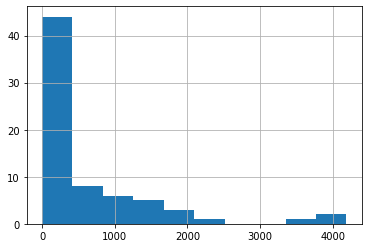

In [80]:
scj_working.Volume.hist()

### Demand elasticity

use the dataframe scj_working as your starting point!

#### all OEMS

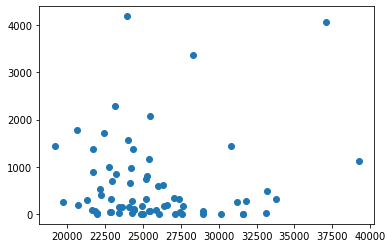

In [81]:
plt.plot (scj_working.msrp, scj_working.Volume, 'o')

very hard to tell what is viable due to the low-frequency values

In [82]:
scj_working.Volume.describe()

count      70.000000
mean      618.385714
std       895.526520
min         0.000000
25%        58.000000
50%       261.000000
75%       845.000000
max      4189.000000
Name: Volume, dtype: float64

using a threshhold of the mean volume - 10% of the max volume, lets cut out the smaller datapoints

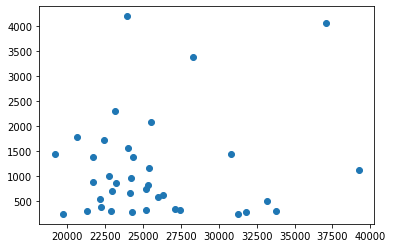

In [83]:
scj_filtered = scj_working[scj_working.Volume >= 220].copy()
plt.plot(scj_filtered.msrp, scj_filtered.Volume, 'o')

honestly not fantastic, but there's still something. <br>
I imagine that brand normalisation may help quite a bit

#### Singled-out OEMS

In [84]:
for col in df.columns: print (col)

UID
Country
Make
Model
Version
Model gener
Data status
Data date
Body type
Doors
Liters
kW
hp/PS
Fuel
Powertrain type
type
Price curr
Price
Price + del
Cty price
Charges
nat tax 2 name
nat tax 2 amnt
nat tax 3 name
nat tax 3 amnt
Version state
Seating cap
Emis ctrl level
std met
WLTP emissions
testing type
comb
Power
max torq Nm
Secondary power
Start/Stop
Engine
# of cyls
Electric motor
Hybrid type
Plug-in
Elec drvn whls
Performance
max speed(km/h)
acc 0-100 km/h
Elec pwr srce
WLTP elec range
WLTP EEC
Charging cnnctr
Charging info
Battery subscrp
Energy recup
Solar power
Pow consumption
Rem batt mgmt
Block htr
Fuel use (new)
standard
combinedl/100km
Particle filter
Trans
# of speeds
trans dsc
g/change pad
Trans.
Wheels
Drive
4wd type
Wheels.1
desc ctrl sys
Wrnty wl vh Tot
months
Warr battery
Hill holder
Diff lock
L.S.D.
Ter type sel
4-wheel steer
Resp susp
Driver modes
Susp level
Power steer
Ceramic brakes
Cruise ctrl
adap cruise con
stop/go fnctn
Speed limiter
Lane dep wrn
Overtake se

In [85]:
scj_working.Brand.unique()

array(['FIAT', 'SEAT', 'CITROEN', 'RENAULT', 'FORD', 'HYUNDAI', 'KIA'],
      dtype=object)

In [86]:
scj_working.Model.unique()

array(['500X', 'ARONA', 'C3 AIRCROSS', 'CAPTUR', 'ECOSPORT', 'KONA',
       'STONIC'], dtype=object)

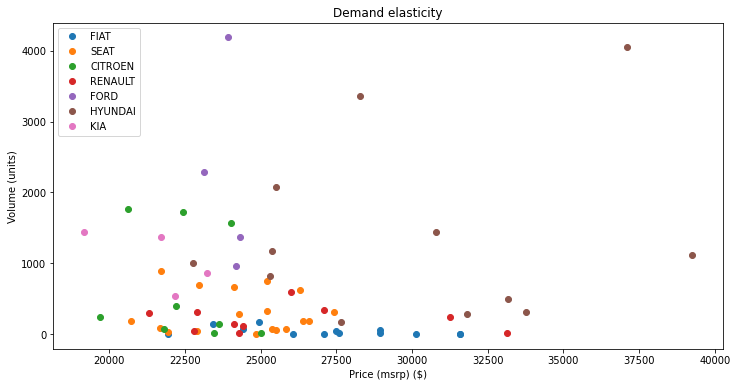

In [87]:
plt.rcParams['figure.figsize'] = (12,6)
for OEM in scj_working.Brand.unique():
    temp_df = scj_working[scj_working.Brand == OEM].copy()
    plt.plot(temp_df.msrp, temp_df.Volume, 'o', label = OEM)
plt.title('Demand elasticity')
plt.ylabel('Volume (units)')
plt.xlabel('Price (msrp) ($)')
plt.legend()
plt.show()

In [88]:
def internal_elasticity (OEM):
    
    temp_df = scj_working[scj_working.Brand == OEM].copy()
    x = temp_df.msrp.values
    y = temp_df.Volume.values
    Poly = np.polyfit(x, y, deg=1)
    plt.plot (x, y, 'o')
    plt.plot(x, np.polyval(Poly, x), '-')
    plt.title (OEM)
    plt.show()
    

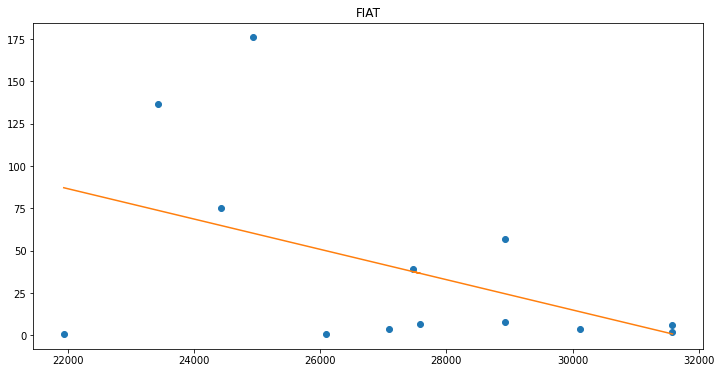

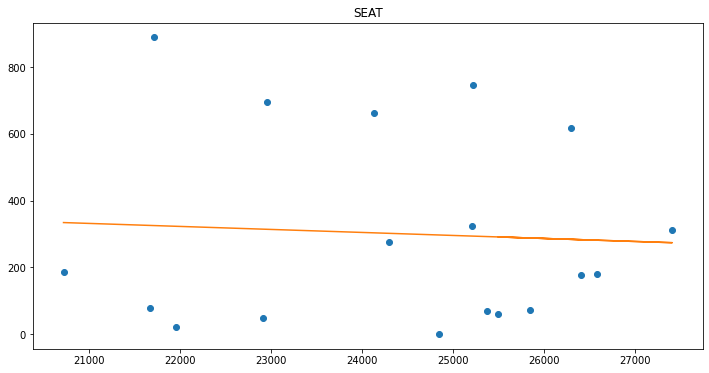

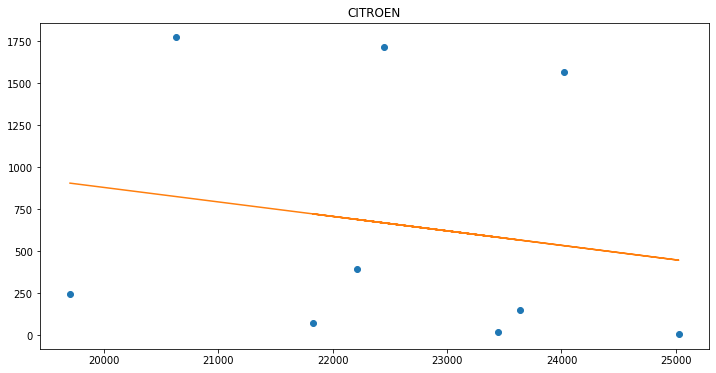

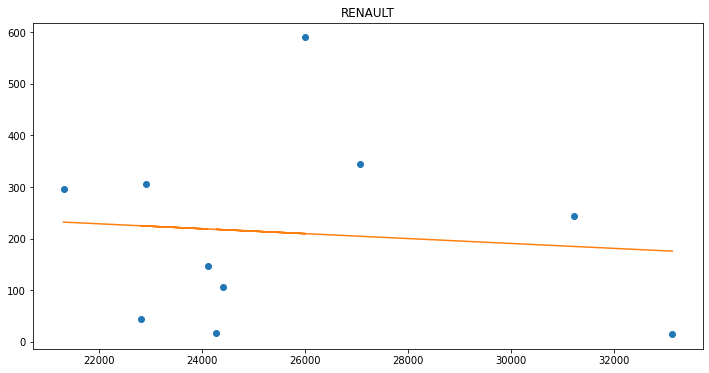

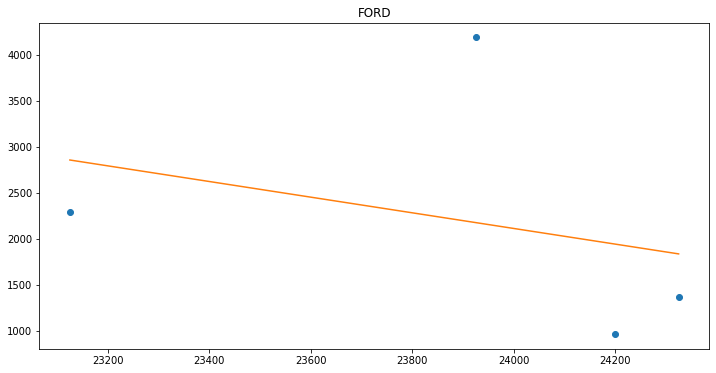

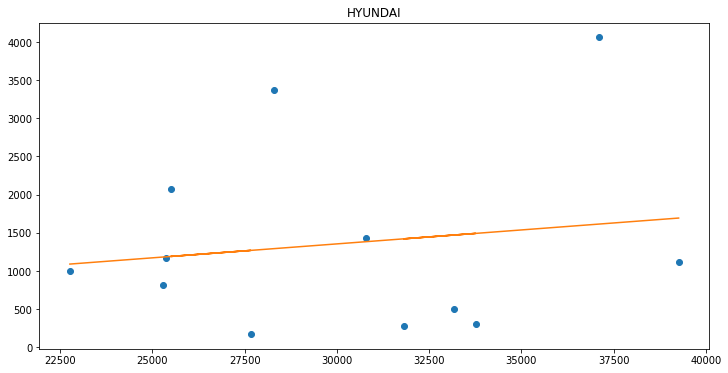

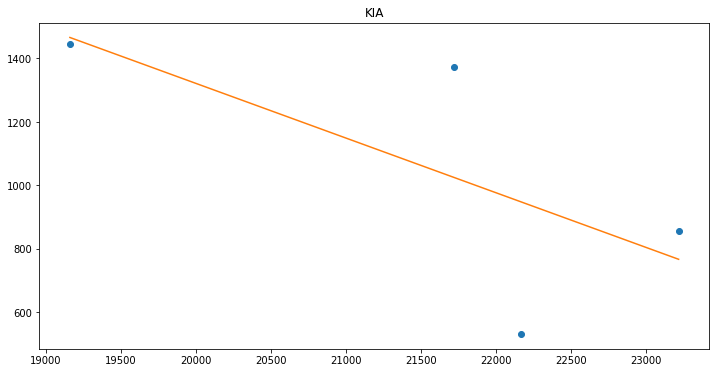

In [89]:
for OEM in scj_working.Brand.unique():
    internal_elasticity(OEM)

In [90]:
scj_working.groupby('Brand').mean()['Volume']

Brand
CITROEN     659.555556
FIAT         39.769231
FORD       2203.250000
HYUNDAI    1357.416667
KIA        1051.750000
RENAULT     210.900000
SEAT        300.888889
Name: Volume, dtype: float64

### Revenue Elasticity

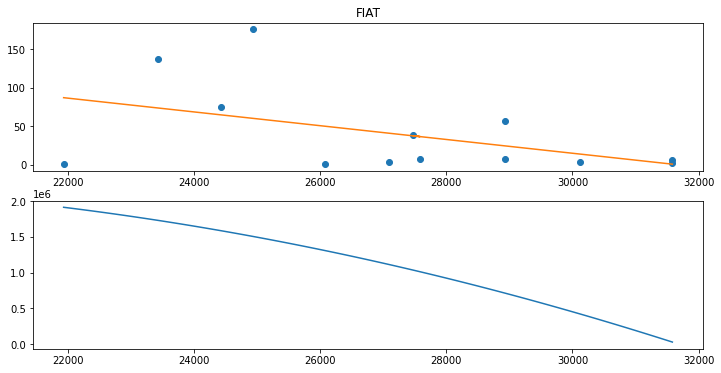

In [91]:
OEM = 'FIAT'
fiat = scj_working[scj_working.Brand == OEM].copy()
x = fiat.msrp.values
y = fiat.Volume.values
Poly = np.polyfit(x, y, deg=1)
alpha, K = Poly
revenue = [alpha, K, 0]
plt.subplot(2,1,1)
plt.plot (x, y, 'o')
plt.plot(x, np.polyval(Poly, x), '-')
plt.title (OEM)
plt.subplot(2,1,2)
X = np.linspace(min(x), max(x), num=100)
plt.plot(X, np.polyval(revenue, X))
plt.show()

In [ ]:
def internal_revenue_elasticity (OEM):
    
    temp_df = scj_working[scj_working.Brand == OEM].copy()
    x = temp_df.msrp.values
    y = temp_df.Volume.values
    Poly = np.polyfit(x, y, deg=1)
    plt.plot (x, y, 'o')
    plt.plot(x, np.polyval(Poly, x), '-')
    plt.title (OEM)
    plt.show()

#### Brand normalisation

In [92]:
scj_working.columns

Index(['UID', 'Make', 'Model', 'Country', 'msrp', 'Model_slim', 'Brand',
       'Year_Vol', 'Volume'],
      dtype='object')

In [98]:
scj_working = scj_working.drop(columns='Brand_mean', axis=1)
scj_working.columns

Index(['UID', 'Make', 'Model', 'Country', 'msrp', 'Model_slim', 'Brand',
       'Volume'],
      dtype='object')

In [100]:
scj_working['Brand_mean'] = scj_working.groupby('Make')['Volume'].transform('mean')
scj_working

,UID,Make,Model,Country,msrp,Model_slim,Brand,Volume,Brand_mean
0,8315258,FIAT,500X,GB,21934.0,500X,FIAT,1,39.769231
1,8011239,FIAT,500X,GB,23434.0,500X,FIAT,137,39.769231
2,8285117,FIAT,500X,GB,24434.0,500X,FIAT,75,39.769231
3,8124264,FIAT,500X,GB,24934.0,500X,FIAT,176,39.769231
4,8285112,FIAT,500X,GB,26084.0,500X,FIAT,1,39.769231
5,8315265,FIAT,500X,GB,27084.0,500X,FIAT,4,39.769231
6,8285111,FIAT,500X,GB,27584.0,500X,FIAT,7,39.769231
7,8315259,FIAT,500X,GB,27474.0,500X,FIAT,39,39.769231
8,8315260,FIAT,500X,GB,28934.0,500X,FIAT,57,39.769231
9,8315263,FIAT,500X,GB,28934.0,500X,FIAT,8,39.769231


In [101]:
scj_working['Norm_Volume'] = scj_working['Volume']/scj_working['Brand_mean']
scj_working

,UID,Make,Model,Country,msrp,Model_slim,Brand,Volume,Brand_mean,Norm_Volume
0,8315258,FIAT,500X,GB,21934.0,500X,FIAT,1,39.769231,0.025145
1,8011239,FIAT,500X,GB,23434.0,500X,FIAT,137,39.769231,3.444874
2,8285117,FIAT,500X,GB,24434.0,500X,FIAT,75,39.769231,1.885880
3,8124264,FIAT,500X,GB,24934.0,500X,FIAT,176,39.769231,4.425532
4,8285112,FIAT,500X,GB,26084.0,500X,FIAT,1,39.769231,0.025145
5,8315265,FIAT,500X,GB,27084.0,500X,FIAT,4,39.769231,0.100580
6,8285111,FIAT,500X,GB,27584.0,500X,FIAT,7,39.769231,0.176015
7,8315259,FIAT,500X,GB,27474.0,500X,FIAT,39,39.769231,0.980658
8,8315260,FIAT,500X,GB,28934.0,500X,FIAT,57,39.769231,1.433269
9,8315263,FIAT,500X,GB,28934.0,500X,FIAT,8,39.769231,0.201161


#### Normalised Demand elasticity

### Revenue Optimisation